## 신한카드 데이터를 이용한 COVID-19 이후의 
## 지역별 신용카드 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

native = pd.read_csv("native_re.csv", low_memory=False)
native_df = pd.DataFrame(native)
# csv파일로 변환시 생성된 불필요한 칼럼은 드롭합니다.
native_df.drop(["Unnamed: 0"], axis=1, inplace=True)

print("-----------------NATIVE-------------------------")

print("###내국인 데이터 정보를 확인합니다.###")
print(native_df.head(3))
print(native_df.info(show_counts=True))


-----------------NATIVE-------------------------
###내국인 데이터 정보를 확인합니다.###
   v1  v2 v3   gb3   gb2 sex_ccd cln_age_r   ta_ym daw_ccd_r apv_ts_dl_tm_r  \
0  세종  세종  .  취미오락    외식       M        30  201701       RED             활동   
1  세종  세종  .  취미오락  종합쇼핑       M        50  201701       RED             휴식   
2  세종  세종  .  취미오락  종합쇼핑       M        30  201701     WHITE             휴식   

         vlm   usec  
0  351296766  19010  
1   72244196   2375  
2  532911085  19979  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52714754 entries, 0 to 52714753
Data columns (total 12 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   v1              52457766 non-null  object
 1   v2              52714754 non-null  object
 2   v3              52714754 non-null  object
 3   gb3             52714754 non-null  object
 4   gb2             52714754 non-null  object
 5   sex_ccd         52714754 non-null  object
 6   cln_age_r       52714754 

결손 데이터가 존재하기 때문에 결손 데이터를 처리합니다.
cln_age_r, v1, v2, v3에서 결손 데이터가 있기 때문에, 이를 다른 값으로 대체합니다.

In [2]:
native_df["v1"].fillna("none", inplace=True)
print("데이터 세트 Null값 개수 ", native_df.isnull().sum().sum())

데이터 세트 Null값 개수  0


In [3]:
print("이용회원 거주지값 분포: \n", native_df["v1"].value_counts())
print("카드 이용 가맹점 주소값 분포: \n", native_df["v2"].value_counts())
print("카드 이용 가맹점 주소(시군구)값 분포: \n", native_df["v3"].value_counts())

이용회원 거주지값 분포: 
 경기      6177831
서울      5815606
인천      3701423
경남      3385931
부산      3332028
경북      3207195
충남      3074547
강원      2947688
충북      2946912
대구      2803398
전남      2636844
대전      2599829
전북      2520885
광주      2321137
울산      2217761
제주      1400912
세종      1367839
none     256988
Name: v1, dtype: int64
카드 이용 가맹점 주소값 분포: 
 서울    9728025
경기    8733762
부산    3832920
경북    3631179
강원    3363646
경남    3140599
전남    3117551
충남    3071841
인천    2473159
전북    2293722
충북    2069290
대구    2010458
대전    1641966
광주    1281214
울산    1086410
제주     925164
세종     313848
Name: v2, dtype: int64
카드 이용 가맹점 주소(시군구)값 분포: 
 중구     2017931
서구     1327728
동구     1322948
남구      929158
북구      923831
        ...   
청양군      61452
봉화군      56849
울릉군      56695
의령군      56596
영양군      35403
Name: v3, Length: 207, dtype: int64


In [4]:
print("가맹점 업종 소분류값 분포: \n", native_df["gb2"].value_counts())
print("가맹점 업종 대분류값 분포: \n", native_df["gb3"].value_counts())
print("성별값 분포: \n", native_df["sex_ccd"].value_counts())

가맹점 업종 소분류값 분포: 
 외식         8975520
종합쇼핑       7442282
숙박         4122197
미용         3457785
인터넷게임      2977723
패션쇼핑       2769096
유흥         2344594
스포츠용품구매    2320203
목욕         2285910
레저스포츠      2137664
공연관람       1843153
골프         1711486
독서         1487462
애완동물돌보기    1239324
헬스         1216500
체험         1153043
교육훈련       1017684
교통          857393
사진촬영        746901
관광쇼핑        656987
미술공예참여      495565
종교활동        475399
자전거         349054
음악감상        223473
여행사         217852
악기연주        146119
스키           40728
운동경기관람        3657
Name: gb2, dtype: int64
가맹점 업종 대분류값 분포: 
 취미오락      34472779
스포츠활동      7779292
여행         7007472
문화예술활동     3455211
Name: gb3, dtype: int64
성별값 분포: 
 M    29601392
F    23113362
Name: sex_ccd, dtype: int64


In [5]:
print("연령대값 분포: \n", native_df["cln_age_r"].value_counts())
print("이용년월값 분포: \n", native_df["ta_ym"].value_counts())
print("이용 요일값 분포: \n", native_df["daw_ccd_r"].value_counts())

연령대값 분포: 
 20    12528363
30    11376848
40    11240244
50    10422235
60     7147044
기타          19
.            1
Name: cln_age_r, dtype: int64
이용년월값 분포: 
 201908    1106414
201710    1071017
201708    1070037
201905    1067870
201808    1064948
201906    1063918
201809    1063604
201805    1063169
201705    1061614
201807    1053759
201907    1053670
201910    1053648
201707    1053183
201806    1039993
201903    1039306
201909    1039149
201911    1035821
201810    1032299
201706    1026290
201912    1024649
202008    1022177
201709    1022035
201704    1021552
201804    1020174
201904    1019752
201812    1017821
202001    1015403
201803    1011310
201811    1009142
201712    1006914
202010    1004240
201902    1000523
202007     996978
201901     990052
201711     988670
202005     987854
201703     987224
202105     983620
201701     971423
201801     970629
202006     960942
201802     958501
202011     958233
201702     939396
202104     933180
202103     914870
202002     904

In [6]:
print("이용시간대값 분포: \n", native_df["apv_ts_dl_tm_r"].value_counts())
print("취급액값 분포: \n", native_df["vlm"].value_counts())
print("이용건수값 분포: \n", native_df["usec"].value_counts())

이용시간대값 분포: 
 활동    27553609
휴식    19055011
취침     6106134
Name: apv_ts_dl_tm_r, dtype: int64
취급액값 분포: 
 51100         91601
102200        79790
204400        65555
153300        64291
76650         63837
              ...  
1850250           1
10234760          1
35421058          1
68926330          1
1811824702        1
Name: vlm, Length: 8255195, dtype: int64
이용건수값 분포: 
 5         8003229
4         6891693
10        3626840
9         3124888
15        2146449
           ...   
51241           1
182377          1
149625          1
116746          1
441551          1
Name: usec, Length: 133652, dtype: int64


seaborn의 regplot을 이용해 산점도와 선형 회귀 직선으로 함께 표현합니다.  
다른 피처와 이용건수와의 관계를 알아봅니다.  
__이용회원 거주지, 카드이용 가맹점 주소(시), 가맹점 업종 대분류, 가맹점 업종 소분류,  
성별, 연령대, 이용년월, 요일, 이용시간대에 따른 이용건수__ 를 알아봅니다.  

중요한 것은 19년 ~ 21년의 변화이므로(그 전까지는 각종 자료를 통해 정상적이고 지속적인 증가추세를 보인다고 가정)
19~21년의 자료를 먼저 선별합니다.

필요없는 레이블은 드롭합니다.

In [7]:
native_df = native_df[native_df["ta_ym"] >= 202001] #2020년 1월 이후의 데이터만 취급합니다.
native_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695278 entries, 37019476 to 52714753
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   v1              object
 1   v2              object
 2   v3              object
 3   gb3             object
 4   gb2             object
 5   sex_ccd         object
 6   cln_age_r       object
 7   ta_ym           int64 
 8   daw_ccd_r       object
 9   apv_ts_dl_tm_r  object
 10  vlm             int64 
 11  usec            int64 
dtypes: int64(3), object(9)
memory usage: 1.5+ GB


seaborn의 regplot은 숫자형 레이블이 아닌 것은 표로 표현할 수 없기 때문에,  
object 데이터 타입의 레이블은 숫자형 레이블로 변환합니다.

데이터 사이즈가 너무 크기 때문에, 직접적으로 관련이 없는 데이터는 제외합니다.
- 외부 여행객들의 정보만 추출합니다.(거주지와 가맹점의 주소가 같은 레코드는 제외)
- 취침 시간대의 데이터는 제외합니다.
- 취미, 오락 부문의 세부 업종 데이터 중 일부는 제외합니다.(미용, 교육훈련, 인터넷게임, 독서, 애완동물보기, 목욕, 종교활동)
- 스포츠 부문 세부 업종 중 일부는 제외합니다.(운동경기 관람, 헬스, 스포츠 용품 구매, 스키, 사진촬영)
- 문화예술 부문 데이터는 여행과 직접적 관련이 없으므로 제외합니다.

In [8]:
# 거주지와 가맹점의 주소가 같은 레코드를 제외합니다.
native_df = native_df[~(native_df['v1'] == native_df['v2'])]
# 취침 시간대의 데이터는 제외합니다.
native_df = native_df[~(native_df['apv_ts_dl_tm_r'] == '취침')]
# 세부 업종 데이터 중 일부를 제외합니다.
native_df = native_df[(native_df['gb2'] == '외식') |
                       (native_df['gb2'] == '종합쇼핑') |
                       (native_df['gb2'] == '숙박') |
                       (native_df['gb2'] == '패션쇼핑') |
                       (native_df['gb2'] == '유흥') |
                       (native_df['gb2'] == '레저스포츠') |
                       (native_df['gb2'] == '골프') |
                       (native_df['gb2'] == '체험') |
                       (native_df['gb2'] == '교통') |
                       (native_df['gb2'] == '관광쇼핑') |
                       (native_df['gb2'] == '여행사')]
# 문화예술 데이터를 제외합니다.
native_df = native_df[(native_df['gb3'] == '스포츠') |
                      (native_df['gb3'] == '여행') |
                       (native_df['gb3'] == '취미오락')]

native_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6670397 entries, 37019476 to 52714752
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   v1              6670397 non-null  object
 1   v2              6670397 non-null  object
 2   v3              6670397 non-null  object
 3   gb3             6670397 non-null  object
 4   gb2             6670397 non-null  object
 5   sex_ccd         6670397 non-null  object
 6   cln_age_r       6670397 non-null  object
 7   ta_ym           6670397 non-null  int64 
 8   daw_ccd_r       6670397 non-null  object
 9   apv_ts_dl_tm_r  6670397 non-null  object
 10  vlm             6670397 non-null  int64 
 11  usec            6670397 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 661.6+ MB


회귀 분석이 불가능한 레이블들도 존재하므로,  
해당 레이블 데이터들은 우선 선형 회귀가 아닌 차트 시각화를 이용해 분석합니다.
한글 피처는 plot에 표기되지 않으므로 영문 피처로 변환합니다. 

v1  
경기      kyunggi  
서울      seoul  
인천      incheon  
경남      kyungnam  
부산      busan  
경북      kyungbuk  
충남      chungnam  
강원      kangwon  
충북      chungbuk  
대구      daegu  
전남      jeonnam  
대전      daejeon  
전북      jeonbuk  
광주      kwangju  
울산      ulsan  
제주      jeju  
세종      sejong  
none     none  

gb2  
외식         eatout  
종합쇼핑       shopping_general  
숙박         accomodate  
패션쇼핑       shopping_fashion  
유흥         hang_out  
레저스포츠      leisure_sports  
골프         golf  
체험         experience  
교통          transportation  
관광쇼핑        shopping_travel  
여행사         travel_company  

gb3  
취미오락      hobby  
스포츠활동      sports_activity  
여행         traveling  

apv_ts...  
활동    activity  
휴식    relaxing  
취침     sleeping  

In [9]:
sh_features = ["v1", "v2", "v3", "gb2", "gb3", "apv_ts_dl_tm_r"]

for feature in sh_features:
    print(native_df[feature].unique())

['경기' '광주' '전남' '대전' '인천' '제주' '부산' '강원' '울산' '충남' '세종' '전북' '경남' '서울'
 '대구' '충북' '경북' 'none']
['세종' '광주' '대구' '부산' '울산' '인천' '대전' '서울' '경기' '강원' '전남' '경남' '경북' '충남'
 '전북' '충북' '제주']
['.' '남구' '동구' '북구' '서구' '중구' '가평군' '강남구' '강동구' '강릉시' '강북구' '강서구' '강진군'
 '강화군' '거제시' '거창군' '경산시' '경주시' '계룡시' '계양구' '고령군' '고성군' '고양시' '고창군' '고흥군'
 '곡성군' '공주시' '과천시' '관악구' '광명시' '광산구' '광양시' '광주시' '광진구' '괴산군' '구례군' '구로구'
 '구리시' '구미시' '군산시' '군위군' '군포시' '금산군' '금정구' '금천구' '기장군' '김제시' '김천시' '김포시'
 '김해시' '나주시' '남동구' '남원시' '남해군' '노원구' '논산시' '단양군' '달서구' '달성군' '담양군' '당진시'
 '대덕구' '도봉구' '동래구' '동작구' '동해시' '마포구' '목포시' '무안군' '무주군' '문경시' '밀양시' '보령시'
 '보성군' '보은군' '봉화군' '부안군' '부여군' '부천시' '부평구' '사상구' '사천시' '사하구' '산청군' '삼척시'
 '상주시' '서산시' '서천군' '서초구' '성남시' '성동구' '성북구' '성주군' '속초시' '송파구' '수성구' '수영구'
 '수원시' '순창군' '순천시' '시흥시' '신안군' '아산시' '안동시' '안산시' '안성시' '안양시' '양구군' '양산시'
 '양양군' '양주시' '양천구' '양평군' '여수시' '여주시' '연수구' '연제구' '연천군' '영광군' '영덕군' '영도구'
 '영동군' '영암군' '영양군' '영월군' '영주시' '영천시' '예산군' '예천군' '오산시' '옥천군' '옹진군' '완도군'
 '완주군' '용산구' '용

In [10]:
# v1 피처값을 영문으로 변환합니다.
v1_originals = ['경기', '광주', '전남', '대전', '인천', '제주', '부산', '강원', '울산', '충남', '세종',
                '전북', '경남', '서울', '대구,', '충북', '경북']
# v1_transformed = [
#  'kyunggi',
#  'kwangju',
#  'jeonnam',
#  'daejeon',
#  'incheon',
#  'jeju',
#  'busan',
#  'kangwon',
#  'ulsan',
#  'chungnam',
#  'sejong',
#  'jeonbuk',
#  'kyungnam',
#  'seoul',
#  'daegu',
#  'chungbuk',
#  'kyungbuk']

for original in v1_originals:
    if original == '경기':
        native_df["v1"] = native_df["v1"].replace([original], 'kyunggi')
        native_df["v2"] = native_df["v2"].replace([original], 'kyunggi')
    elif original == '광주':
        native_df["v1"] = native_df["v1"].replace([original], 'kwangju')
        native_df["v2"] = native_df["v2"].replace([original], 'kwangju')
    elif original == '전남':
        native_df["v1"] = native_df["v1"].replace([original], 'jeonnam')
        native_df["v2"] = native_df["v2"].replace([original], 'jeonnam')
    elif original == '대전':
        native_df["v1"] = native_df["v1"].replace([original], 'daejeon')
        native_df["v2"] = native_df["v2"].replace([original], 'daejeon')
    elif original == '인천':
        native_df["v1"] = native_df["v1"].replace([original], 'incheon')
        native_df["v2"] = native_df["v2"].replace([original], 'incheon')
    elif original == '제주':
        native_df["v1"] = native_df["v1"].replace([original], 'jeju')
        native_df["v2"] = native_df["v2"].replace([original], 'jeju')
    elif original == '부산':
        native_df["v1"] = native_df["v1"].replace([original], 'busan')
        native_df["v2"] = native_df["v2"].replace([original], 'busan')
    elif original == '강원':
        native_df["v1"] = native_df["v1"].replace([original], 'kangwon')
        native_df["v2"] = native_df["v2"].replace([original], 'kangwon')
    elif original == '울산':
        native_df["v1"] = native_df["v1"].replace([original], 'ulsan')
        native_df["v2"] = native_df["v2"].replace([original], 'ulsan')
    elif original == '충남':
        native_df["v1"] = native_df["v1"].replace([original], 'chungnam')
        native_df["v2"] = native_df["v2"].replace([original], 'chungnam')
    elif original == '세종':
        native_df["v1"] = native_df["v1"].replace([original], 'sejong')
        native_df["v2"] = native_df["v2"].replace([original], 'sejong')
    elif original == '전북':
        native_df["v1"] = native_df["v1"].replace([original], 'jeonbuk')
        native_df["v2"] = native_df["v2"].replace([original], 'jeonbuk')
    elif original == '경남':
        native_df["v1"] = native_df["v1"].replace([original], 'kyungnam')
        native_df["v2"] = native_df["v2"].replace([original], 'kyungnam')
    elif original == '서울':
        native_df["v1"] = native_df["v1"].replace([original], 'seoul')
        native_df["v2"] = native_df["v2"].replace([original], 'seoul')
    elif original == '대구':
        native_df["v1"] = native_df["v1"].replace([original], 'daegu')
        native_df["v2"] = native_df["v2"].replace([original], 'daegu')
    elif original == '충북':
        native_df["v1"] = native_df["v1"].replace([original], 'chungbuk')
        native_df["v2"] = native_df["v2"].replace([original], 'chungbuk')
    else:
        native_df["v1"] = native_df["v1"].replace([original], 'kyungbuk')
        native_df["v2"] = native_df["v2"].replace([original], 'kyungbuk')
        


In [11]:
"""
gb2
외식 eatout
종합쇼핑 shopping_general
숙박 accomodate
패션쇼핑 shopping_fashion
유흥 hang_out
레저스포츠 leisure_sports
골프 golf
체험 experience
교통 transportation
관광쇼핑 shopping_travel
여행사 travel_company
"""

gb2_originals = ['유흥', '패션쇼핑', '외식', '숙박', '체험', '종합쇼핑', '교통', '관광쇼핑', '여행사']

for original in gb2_originals:
    if original == '유흥':
        native_df["gb2"] = native_df["gb2"].replace([original], 'hang_out')
    elif original == '패션쇼핑':
        native_df["gb2"] = native_df["gb2"].replace([original], 'shopping_fashion')
    elif original == '외식':
        native_df["gb2"] = native_df["gb2"].replace([original], 'eatout')
    elif original == '숙박':
        native_df["gb2"] = native_df["gb2"].replace([original], 'accomodation')
    elif original == '체험':
        native_df["gb2"] = native_df["gb2"].replace([original], 'experience')
    elif original == '종합쇼핑':
        native_df["gb2"] = native_df["gb2"].replace([original], 'shopping_general')
    elif original == '교통':
        native_df["gb2"] = native_df["gb2"].replace([original], 'transportation')
    elif original == '관광쇼핑':
        native_df["gb2"] = native_df["gb2"].replace([original], 'shopping_travel')
    else:
        native_df["gb2"] = native_df["gb2"].replace([original], 'travel_company')
        
        
"""
['취미오락' '여행']
['휴식' '활동']
"""

gb3_originals = ['취미오락', '여행']
apv_originals = ['휴식', '활동']

for original in gb3_originals:
    if original == '취미오락':
        native_df["gb3"] = native_df["gb3"].replace([original], 'hobby')
    else:
        native_df["gb3"] = native_df["gb3"].replace([original], 'traveling')
        
for original in apv_originals:
    if original == '휴식':
        native_df["apv_ts_dl_tm_r"] = native_df["apv_ts_dl_tm_r"].replace([original], 'Relax')
    else:
        native_df["apv_ts_dl_tm_r"] = native_df["apv_ts_dl_tm_r"].replace([original], 'activity')

In [12]:
native_df.head(3)

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
37019476,kyunggi,sejong,.,hobby,hang_out,M,40,202001,RED,Relax,6410700,45
37019478,kwangju,sejong,.,hobby,shopping_fashion,M,30,202001,RED,Relax,793050,5
37019489,jeonnam,sejong,.,hobby,eatout,M,60,202001,RED,Relax,504900,10


/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


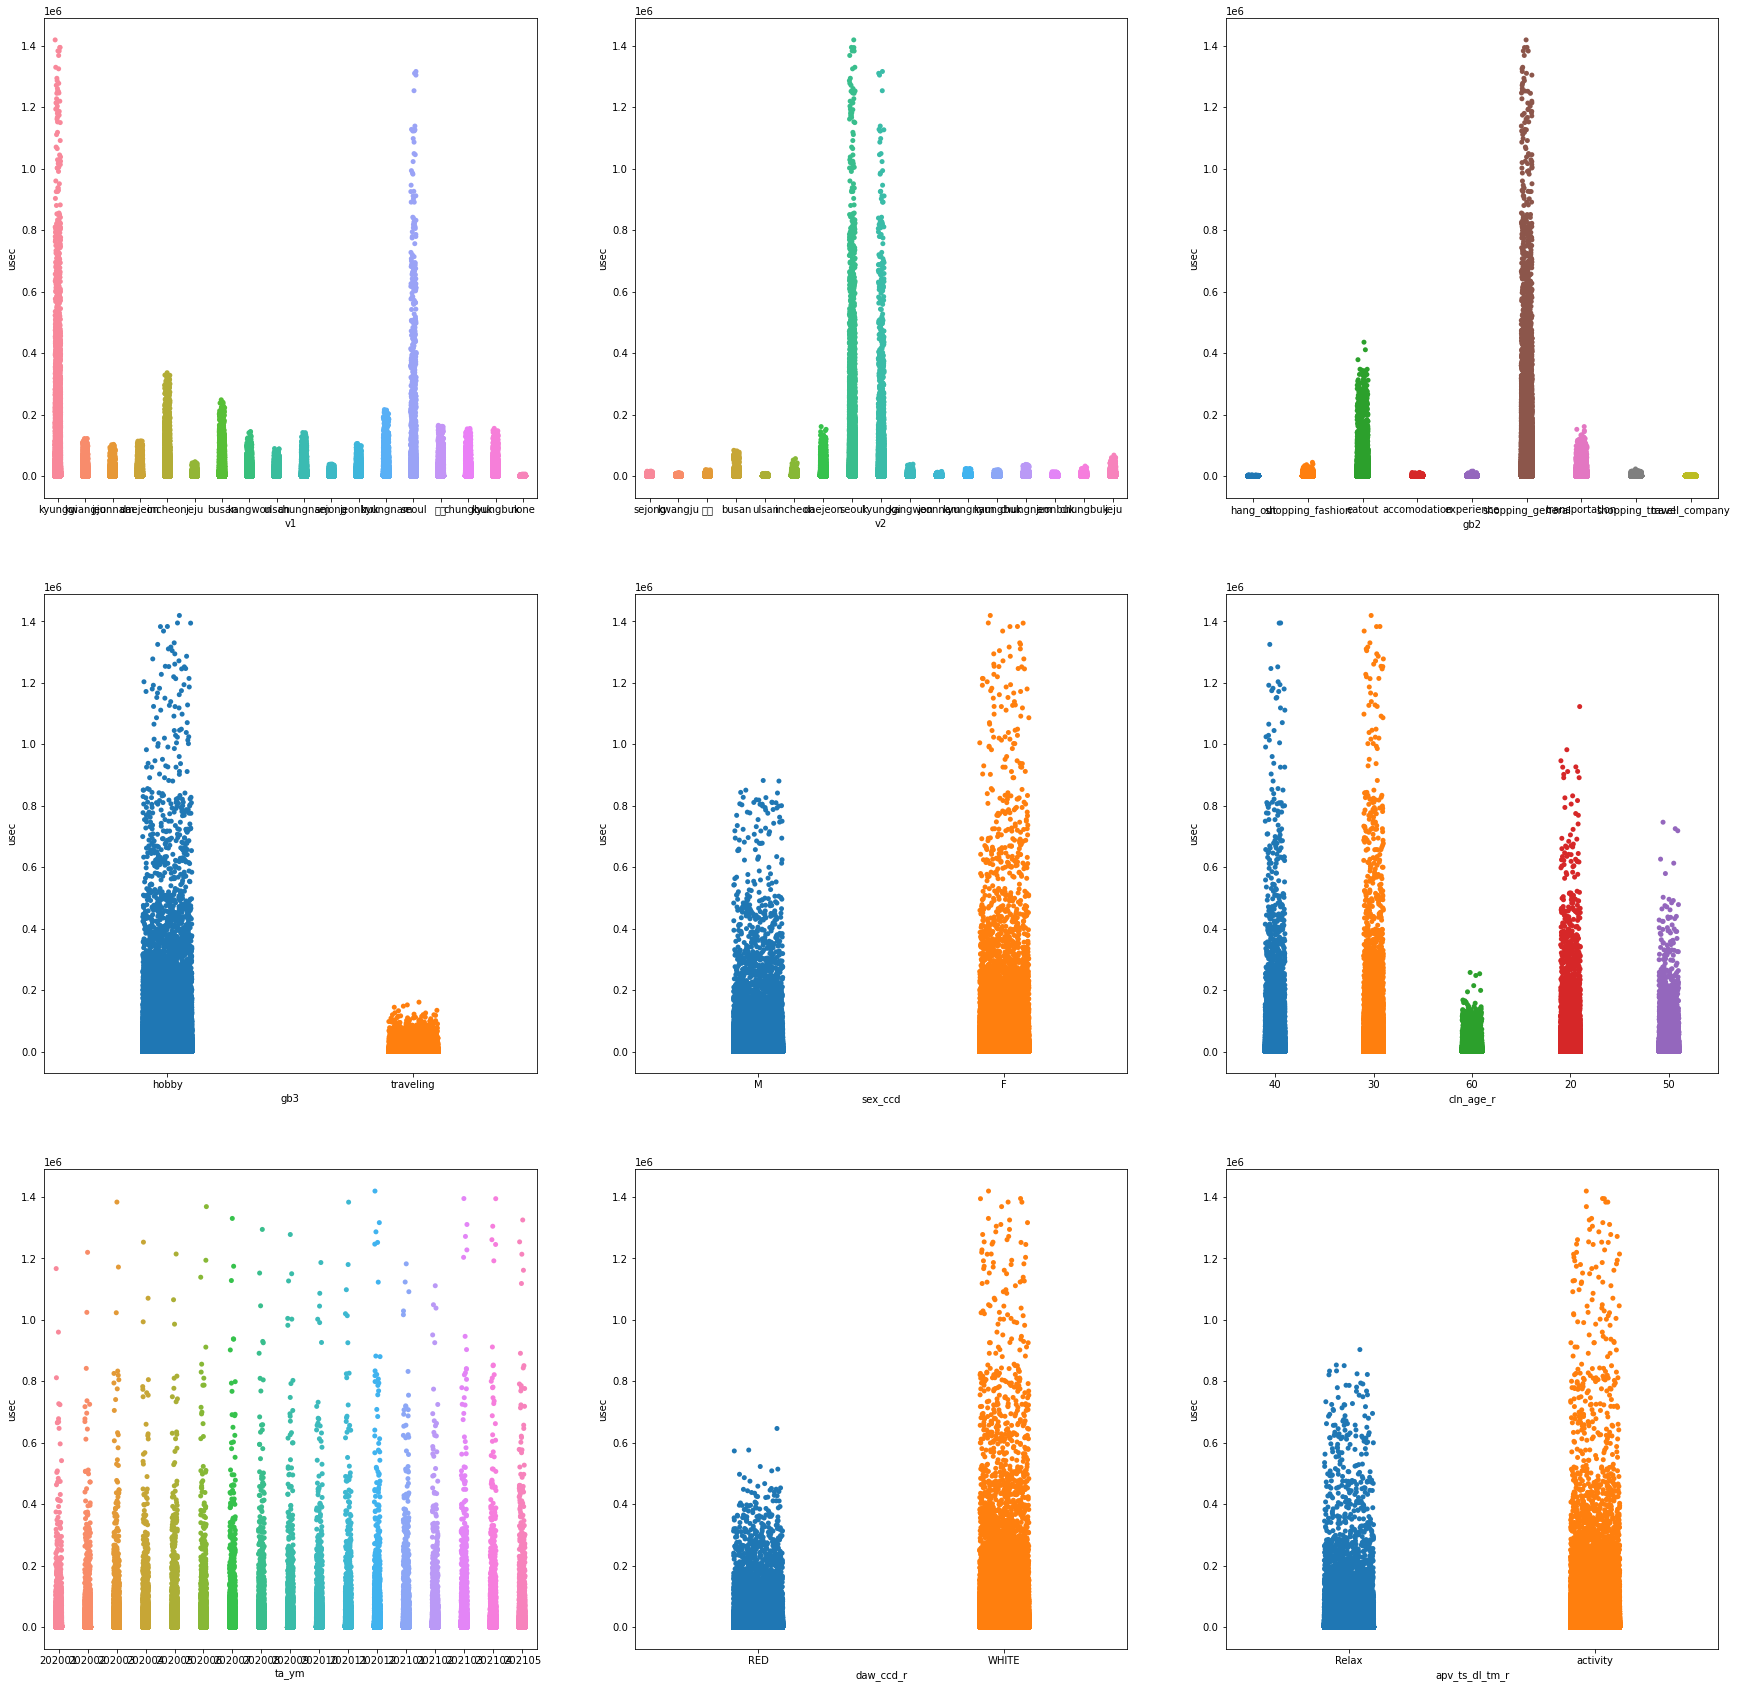

In [13]:
plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="usec", data=native_df, ax=axs[row][col])

#### stripplot으로는 각 피처간 상관관계 파악이 어려우므로,  
#### relplot을 이용해 각 피처간의 상관관계를 파악합니다.

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current

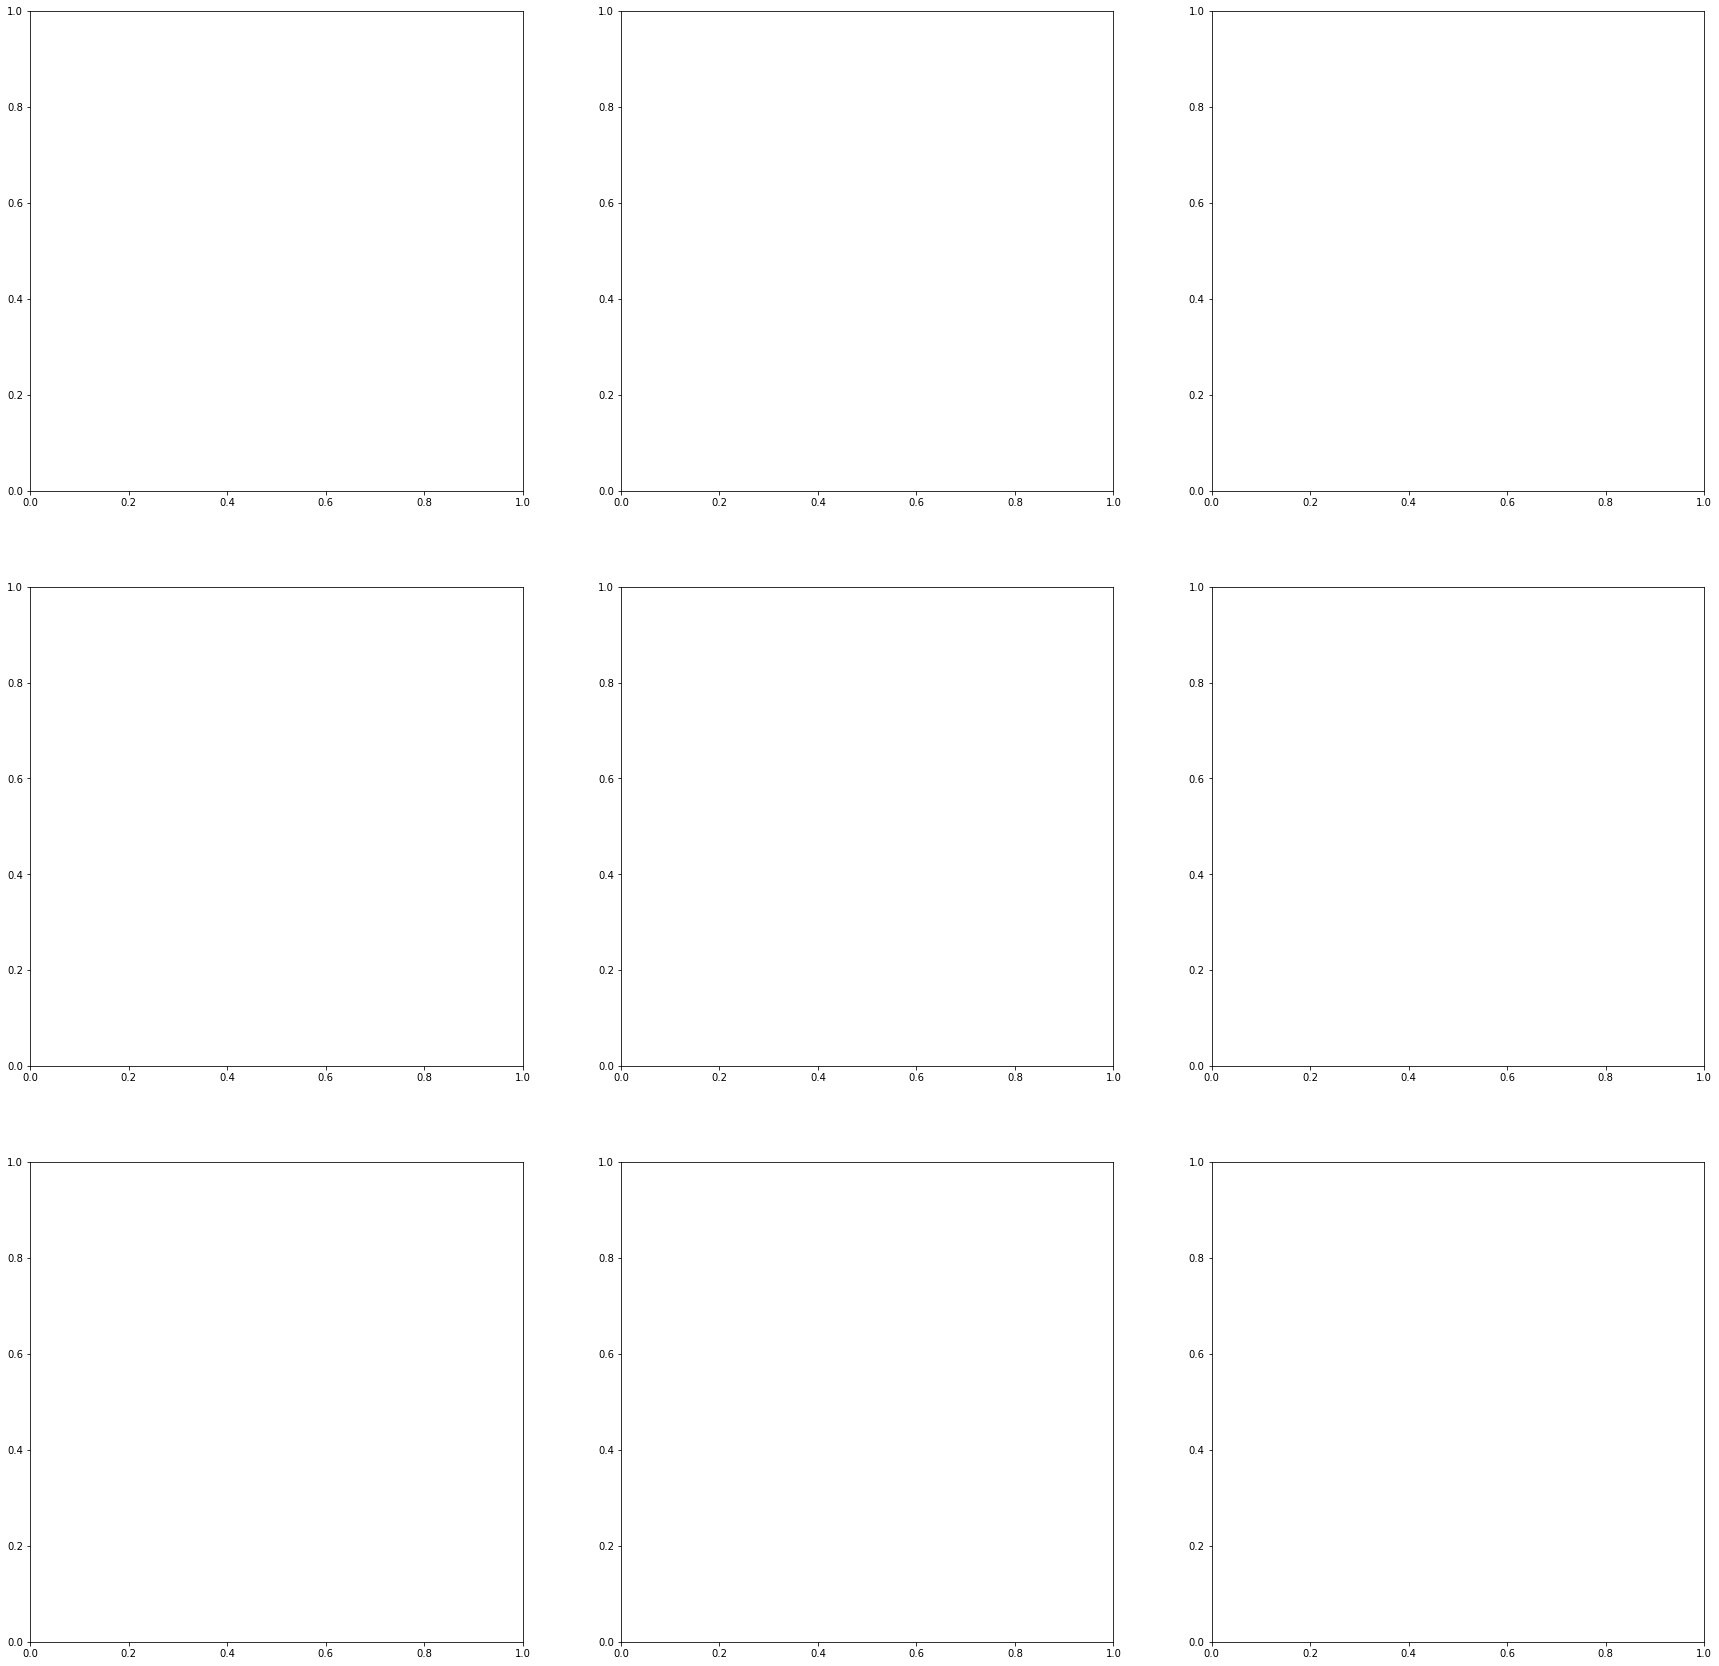

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


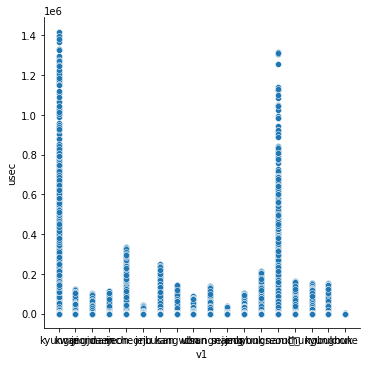

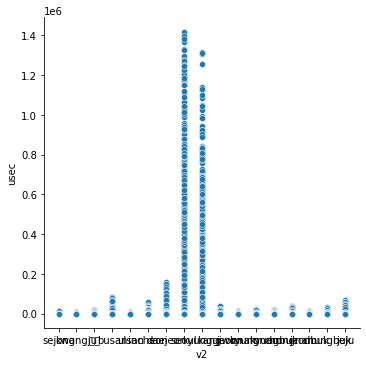

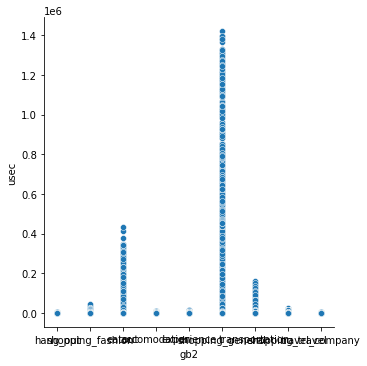

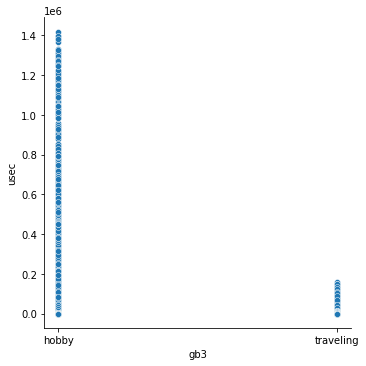

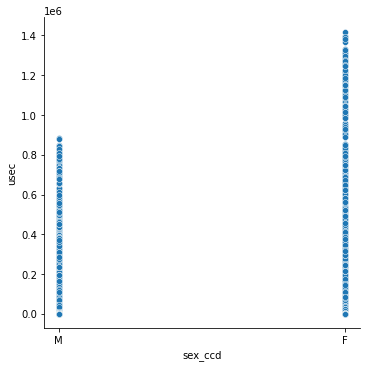

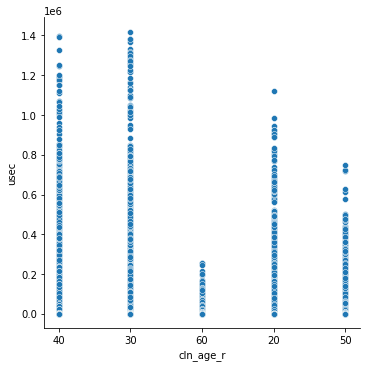

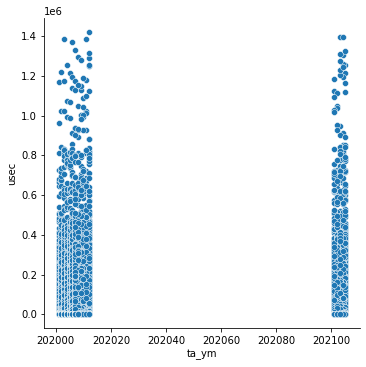

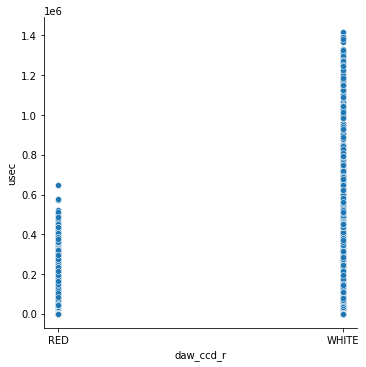

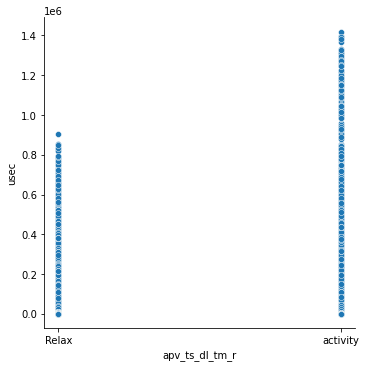

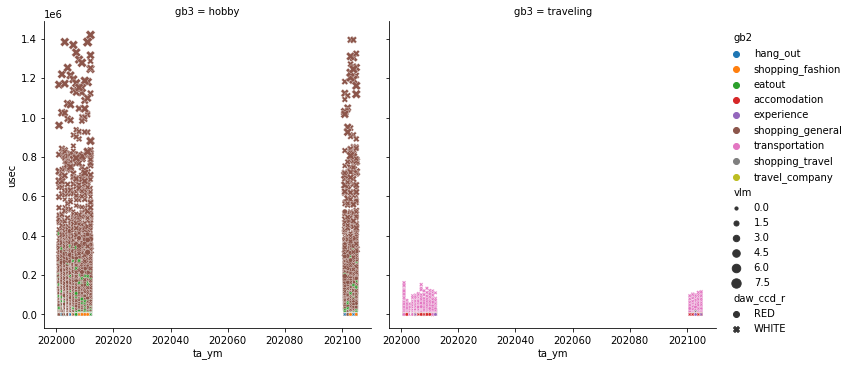

In [14]:
plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.relplot(x=feature, y="usec", data=native_df, ax=axs[row][col])

sns.relplot(data=native_df, x="ta_ym", y="usec", hue="gb2", style="daw_ccd_r", size="vlm", 
           col="gb3", sizes=(10, 100))

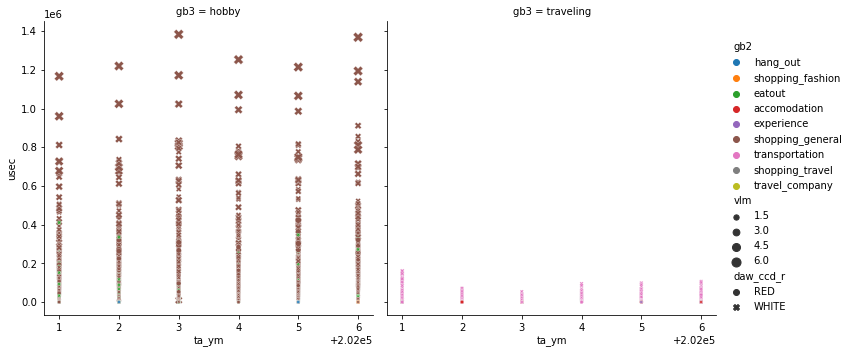

In [15]:
plt.rcParams['figure.figsize'] = [30, 60] # modify default plot size

sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

sns.relplot(data=native_df[native_df['ta_ym'] <= 202006], x="ta_ym", y="usec", hue="gb2", style="daw_ccd_r", size="vlm", 
           col="gb3", sizes=(10, 100))

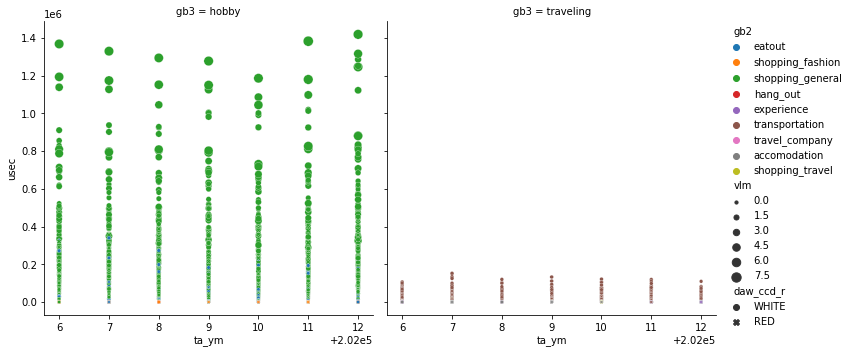

In [16]:
plt.rcParams['figure.figsize'] = [30, 60] # modify default plot size

sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

sns.relplot(data=native_df[(native_df['ta_ym'] >= 202006) & (native_df["ta_ym"] < 202101)], x="ta_ym", y="usec", hue="gb2", style="daw_ccd_r", size="vlm", 
           col="gb3", sizes=(10, 100))

강원 양양, 고성  
전남 고흥, 영광, 진도 의 각 시,군,구 별 데이터를 분석.  


In [17]:
import pandas as pd

nativeDF = pd.DataFrame(native)
nativeDF.drop(["Unnamed: 0"], axis=1, inplace=True)

# 19년 1월 이후의 데이터만 취급
nativeDF = nativeDF[nativeDF["ta_ym"] >= 201901]

# 취침 시간대의 데이터는 제외합니다.
nativeDF = nativeDF[~(nativeDF['apv_ts_dl_tm_r'] == '취침')]
# 세부 업종 데이터 중 일부를 제외합니다.
nativeDF = nativeDF[(nativeDF['gb2'] == '외식') |
                       (nativeDF['gb2'] == '종합쇼핑') |
                       (nativeDF['gb2'] == '숙박') |
                       (nativeDF['gb2'] == '패션쇼핑') |
                       (nativeDF['gb2'] == '유흥') |
                       (nativeDF['gb2'] == '레저스포츠') |
                       (nativeDF['gb2'] == '골프') |
                       (nativeDF['gb2'] == '체험') |
                       (nativeDF['gb2'] == '교통') |
                       (nativeDF['gb2'] == '관광쇼핑') |
                       (nativeDF['gb2'] == '여행사')]
# 문화예술 데이터를 제외합니다.
nativeDF = nativeDF[(nativeDF['gb3'] == '스포츠활동') |
                      (nativeDF['gb3'] == '여행') |
                       (nativeDF['gb3'] == '취미오락')]

In [18]:
print(nativeDF["gb3"].value_counts())

취미오락     9974255
여행       3245246
스포츠활동    1832438
Name: gb3, dtype: int64


In [19]:
# v1 피처값을 영문으로 변환합니다.
v1_originals = ['경기', '광주', '전남', '대전', '인천', '제주', '부산', '강원', '울산', '충남', '세종',
                '전북', '경남', '서울', '대구,', '충북', '경북']

for original in v1_originals:
    if original == '경기':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'KG')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'KG')
    elif original == '광주':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'KJ')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'KJ')
    elif original == '전남':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'JN')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'JN')
    elif original == '대전':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'DJ')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'DJ')
    elif original == '인천':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'IC')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'IC')
    elif original == '제주':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'JJ')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'JJ')
    elif original == '부산':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'BS')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'BS')
    elif original == '강원':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'KW')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'KW')
    elif original == '울산':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'US')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'US')
    elif original == '충남':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'CN')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'CN')
    elif original == '세종':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'SJ')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'SJ')
    elif original == '전북':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'JB')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'JB')
    elif original == '경남':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'KN')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'KN')
    elif original == '서울':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'SU')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'SU')
    elif original == '대구':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'DG')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'DG')
    elif original == '충북':
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'CB')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'CB')
    else:
        nativeDF["v1"] = nativeDF["v1"].replace([original], 'KB')
        nativeDF["v2"] = nativeDF["v2"].replace([original], 'KB')
        


In [20]:
"""
gb2
외식 eatout
종합쇼핑 shopping_general
숙박 accomodate
패션쇼핑 shopping_fashion
유흥 hang_out
레저스포츠 leisure_sports
골프 golf
체험 experience
교통 transportation
관광쇼핑 shopping_travel
여행사 travel_company
"""

gb2_originals = ['유흥', '패션쇼핑', '외식', '숙박', '체험', '종합쇼핑', '교통', '관광쇼핑', '여행사', '레저스포츠', '골프']

for original in gb2_originals:
    if original == '유흥':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'hang_out')
    elif original == '패션쇼핑':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'shopping_fashion')
    elif original == '외식':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'eatout')
    elif original == '숙박':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'accomodation')
    elif original == '체험':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'experience')
    elif original == '종합쇼핑':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'shopping_general')
    elif original == '교통':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'transportation')
    elif original == '관광쇼핑':
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'shopping_travel')
    elif original == '레저스포츠':
        nativeDF['gb2'] = nativeDF['gb2'].replace([original], 'leisure')
    elif original == '골프':
        nativeDF['gb2'] = nativeDF['gb2'].replace([original], 'golf')
    else:
        nativeDF["gb2"] = nativeDF["gb2"].replace([original], 'travel_company')
        
        
"""
['취미오락' '여행']
['휴식' '활동']
"""

gb3_originals = ['취미오락', '여행', '스포츠활동']
apv_originals = ['휴식', '활동']

for original in gb3_originals:
    if original == '취미오락':
        nativeDF["gb3"] = nativeDF["gb3"].replace([original], 'hobby')
    elif original == '여행':
        nativeDF["gb3"] = nativeDF["gb3"].replace([original], 'traveling')
    else:
        nativeDF['gb3'] = nativeDF["gb3"].replace([original], 'sports')
        
for original in apv_originals:
    if original == '휴식':
        nativeDF["apv_ts_dl_tm_r"] = nativeDF["apv_ts_dl_tm_r"].replace([original], 'Relax')
    else:
        nativeDF["apv_ts_dl_tm_r"] = nativeDF["apv_ts_dl_tm_r"].replace([original], 'activity')
        
print(nativeDF['gb3'].value_counts())

hobby        9974255
traveling    3245246
sports       1832438
Name: gb3, dtype: int64


In [21]:
# 각 지역별 데이터프레임 별도 생성
native_yy = nativeDF[nativeDF["v3"] == "양양군"]
native_gs = nativeDF[nativeDF["v3"] == "고성군"]
native_gh = nativeDF[nativeDF["v3"] == "고흥군"]
native_yk = nativeDF[nativeDF["v3"] == "영광군"]
native_jd = nativeDF[nativeDF["v3"] == "진도군"]

# 각 데이터 프레임별로 데이터 정보 확인
print("------양양군------")
native_yy.info(show_counts=True)
print("------고성군------")
native_gs.info(show_counts=True)
print("------고흥군------")
native_gh.info(show_counts=True)
print("------영광군------")
native_yk.info(show_counts=True)
print("------진도군------")
native_jd.info(show_counts=True)

------양양군------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60574 entries, 24534024 to 52714004
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   v1              60022 non-null  object
 1   v2              60574 non-null  object
 2   v3              60574 non-null  object
 3   gb3             60574 non-null  object
 4   gb2             60574 non-null  object
 5   sex_ccd         60574 non-null  object
 6   cln_age_r       60574 non-null  object
 7   ta_ym           60574 non-null  int64 
 8   daw_ccd_r       60574 non-null  object
 9   apv_ts_dl_tm_r  60574 non-null  object
 10  vlm             60574 non-null  int64 
 11  usec            60574 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 6.0+ MB
------고성군------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93803 entries, 24528001 to 52713326
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------         

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


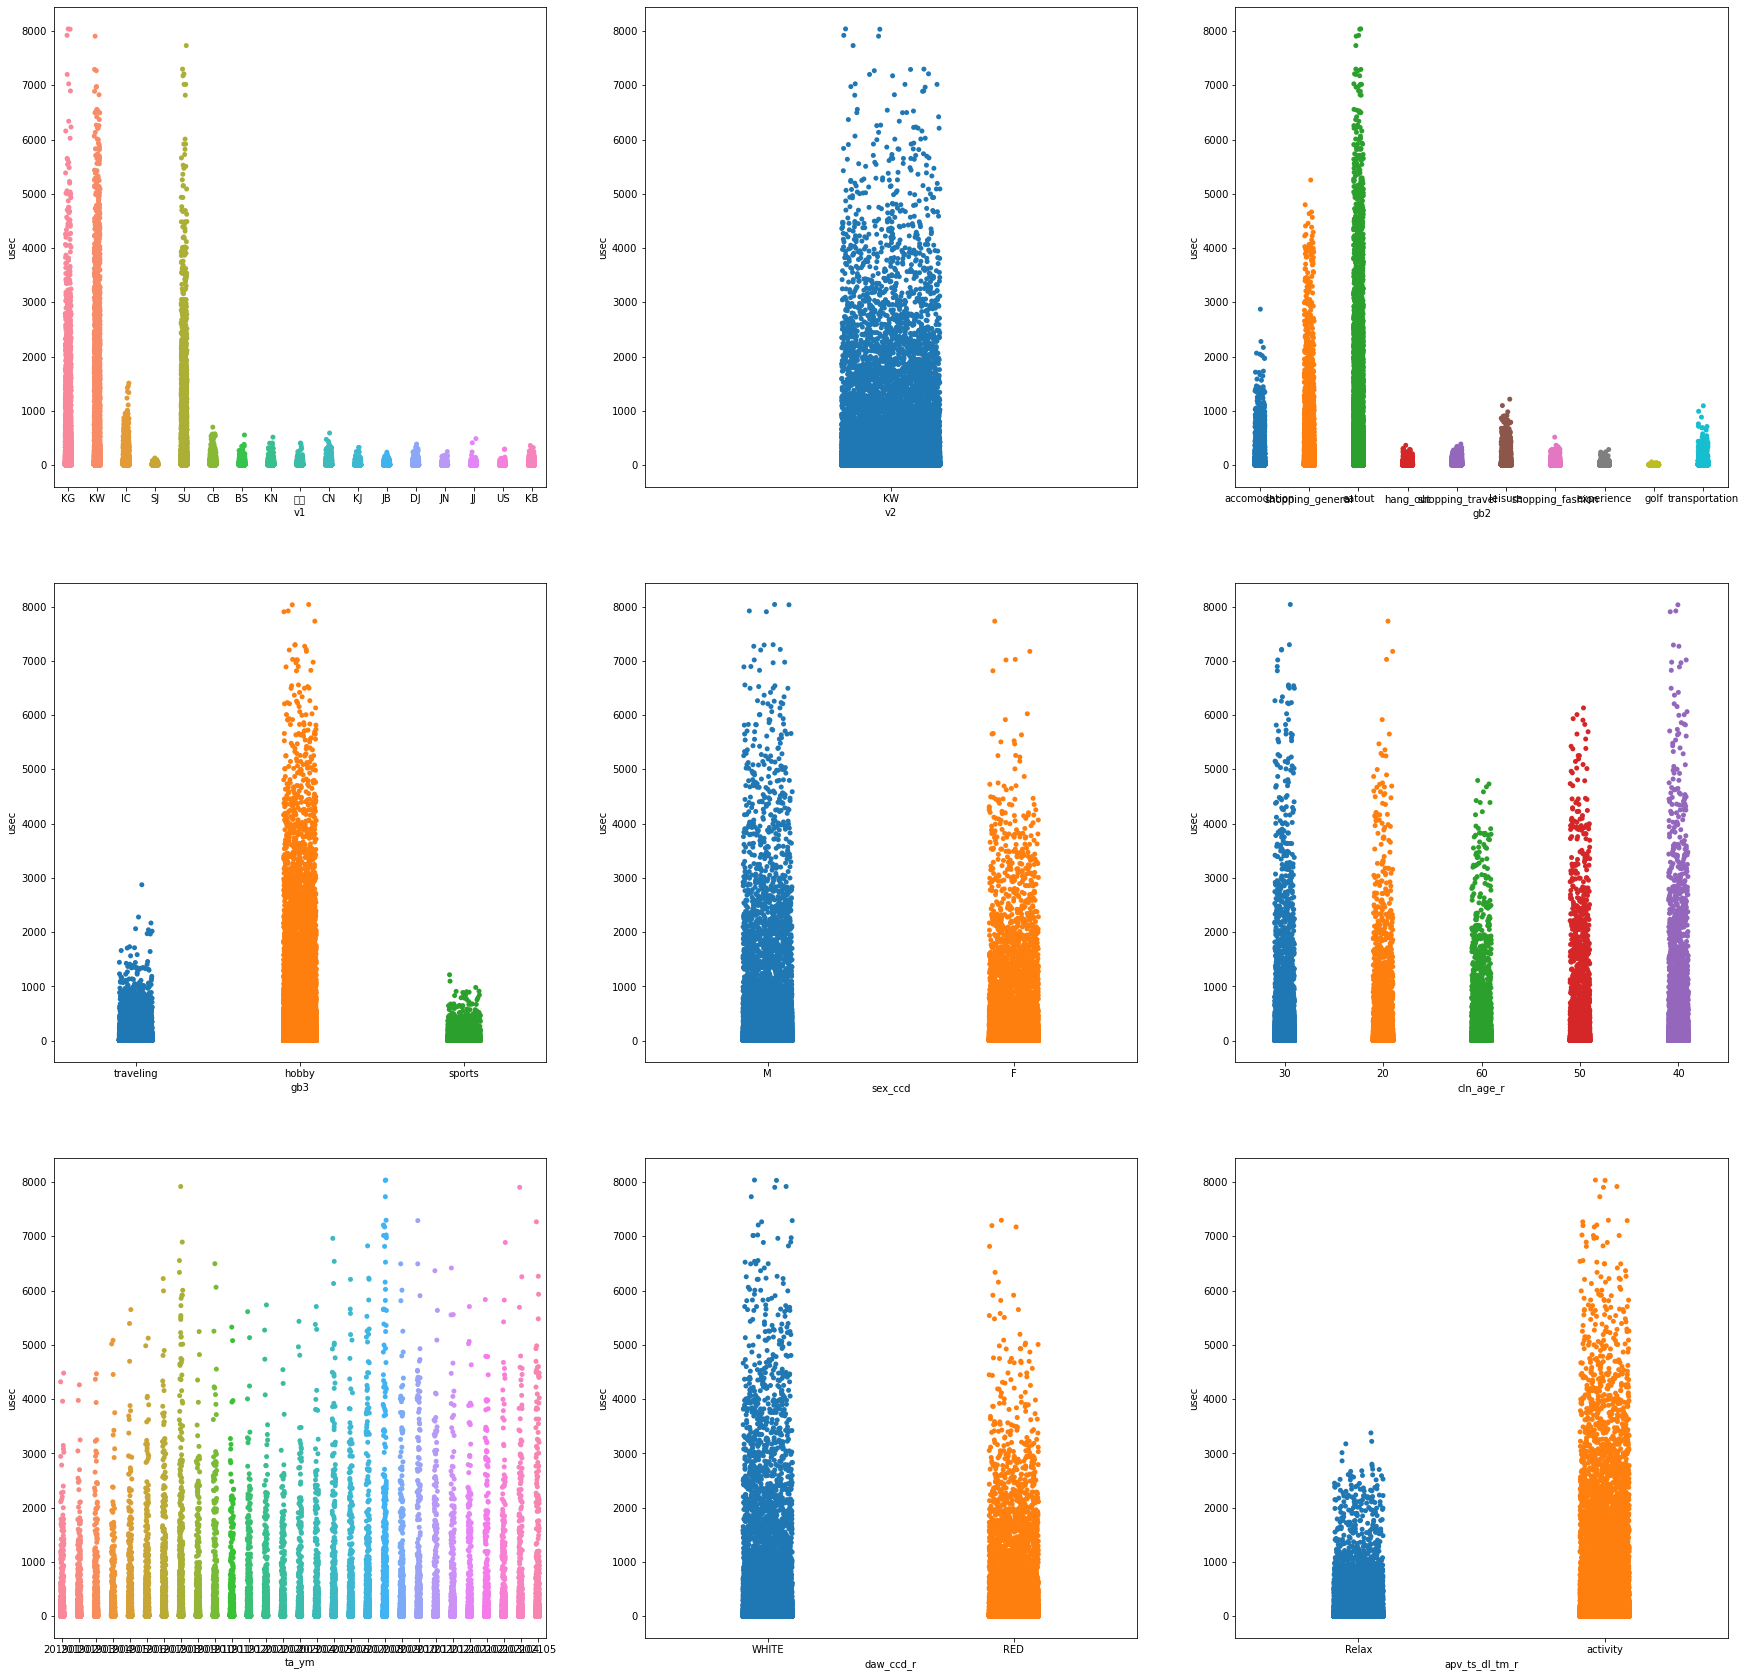

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="usec", data=native_yy, ax=axs[row][col])

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


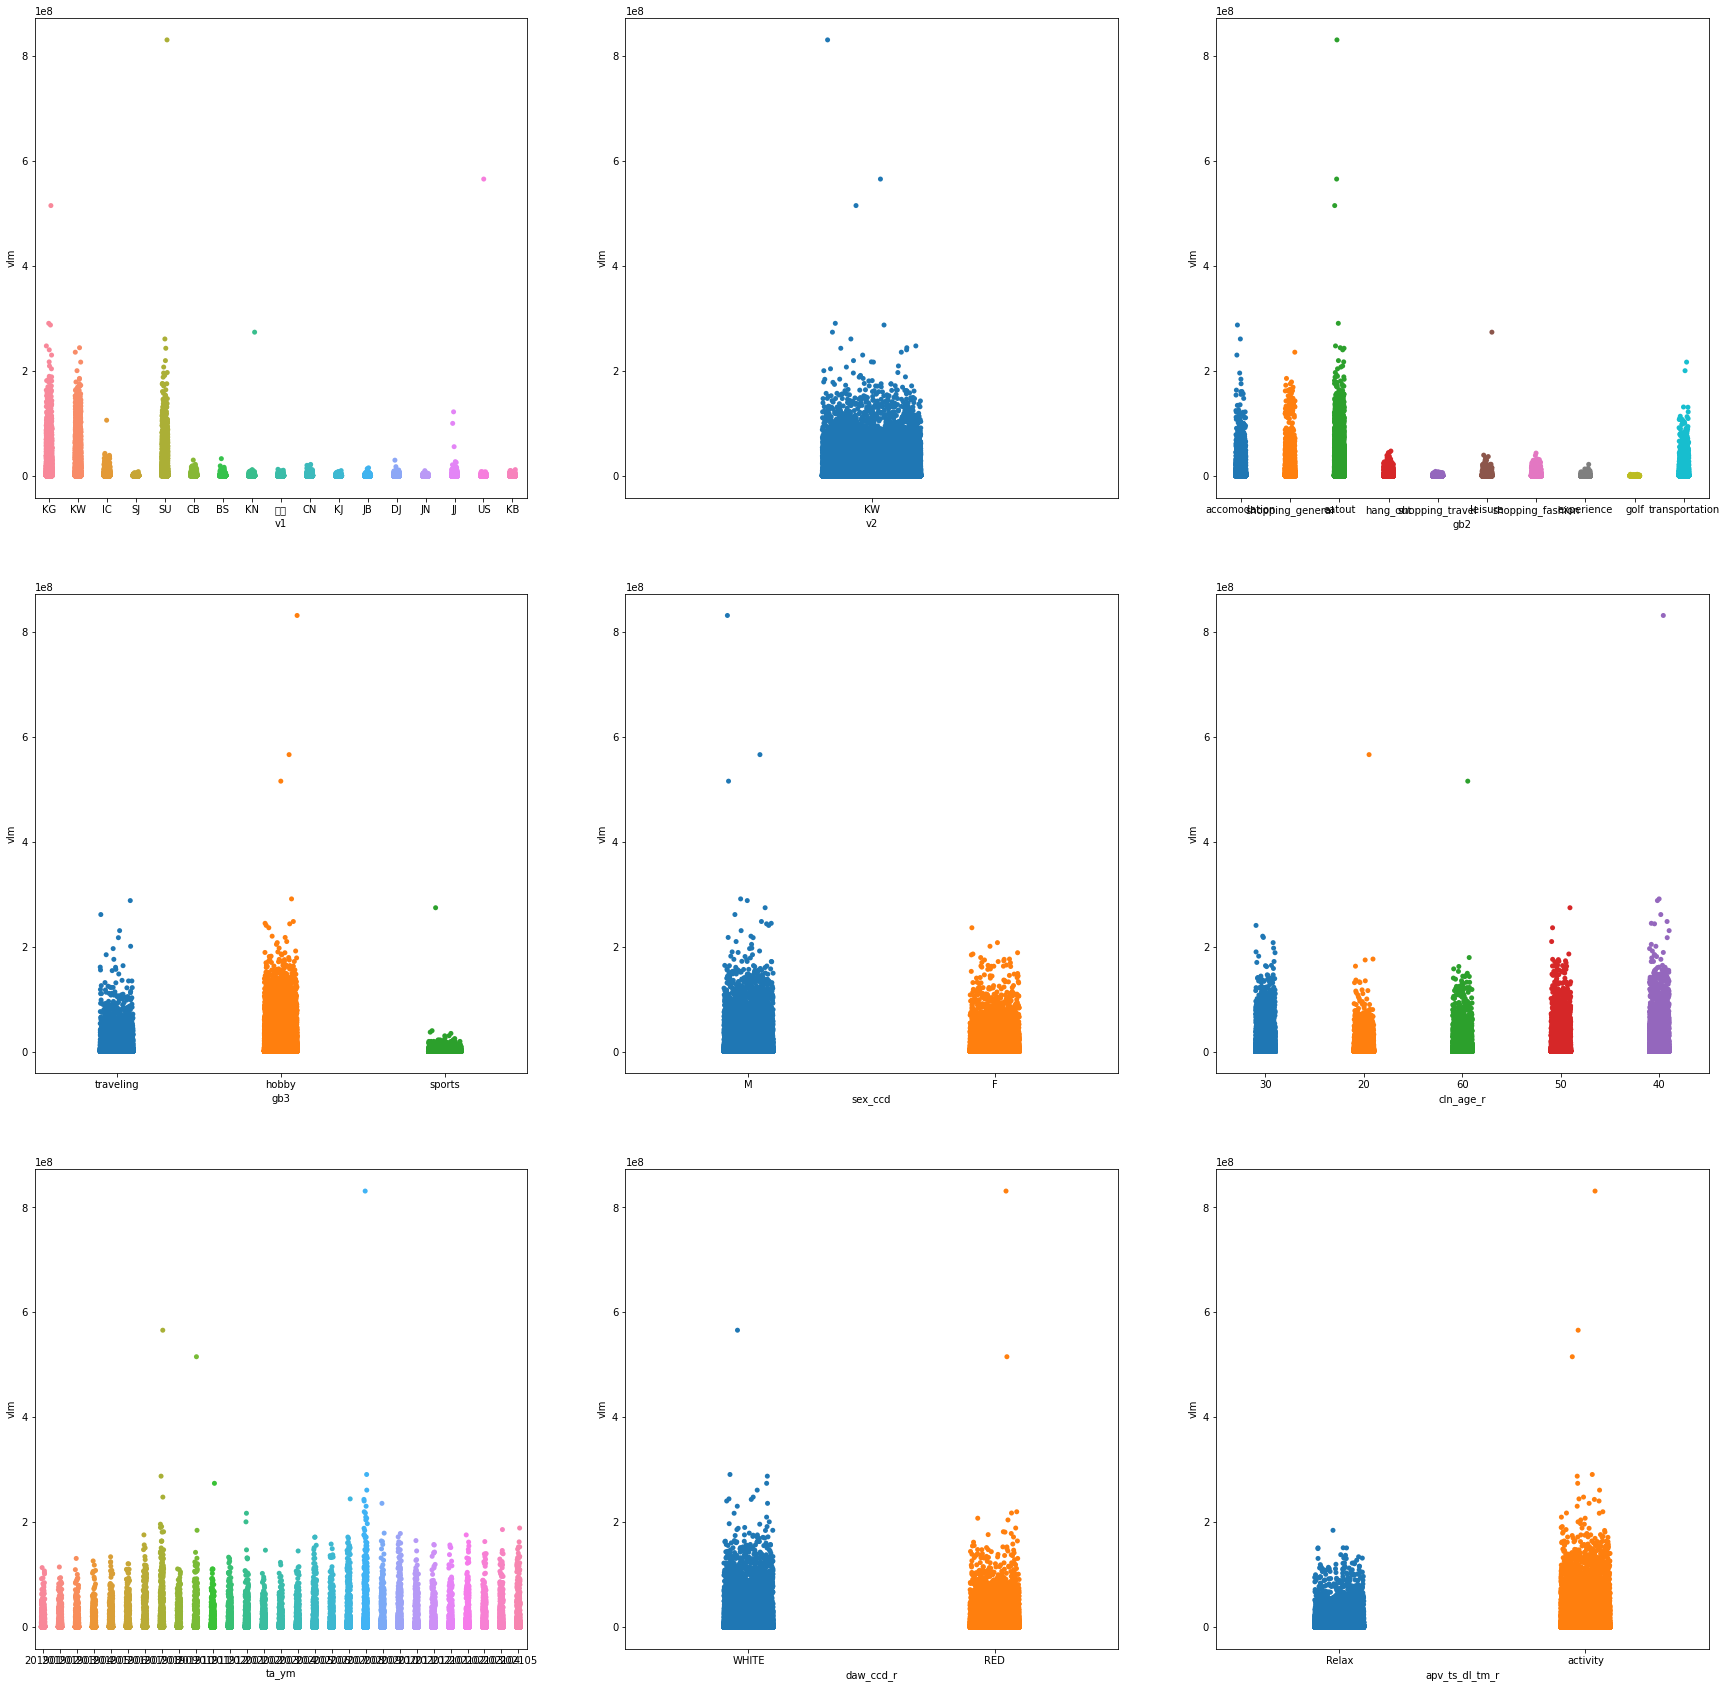

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="vlm", data=native_yy, ax=axs[row][col])

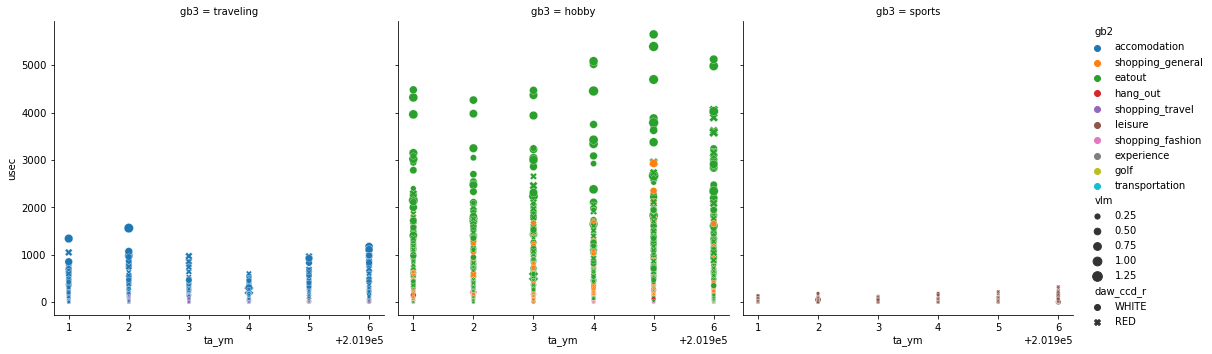

In [24]:
sns.relplot(data=native_yy[(native_yy['ta_ym'] >= 201901) & (native_yy['ta_ym'] <= 201906)], x="ta_ym", y="usec", hue="gb2", style="daw_ccd_r", size="vlm", 
           col="gb3", sizes=(10, 100))

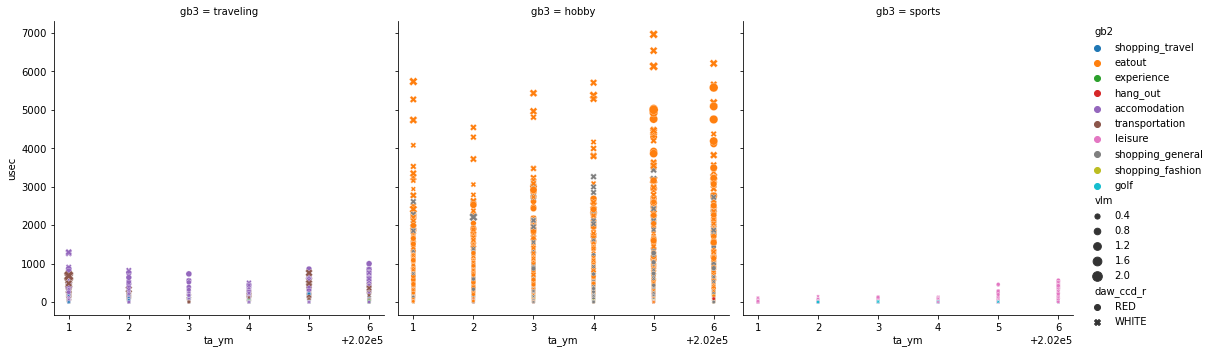

In [25]:
sns.relplot(data=native_yy[(native_yy['ta_ym'] >= 202001) & (native_yy['ta_ym'] <= 202006)], x="ta_ym", y="usec", hue="gb2", style="daw_ccd_r", size="vlm", 
           col="gb3", sizes=(10, 100))

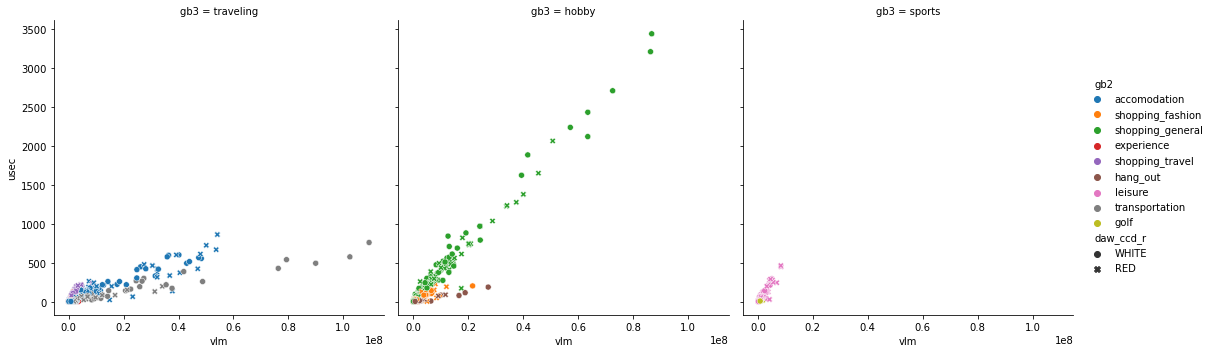

In [26]:
sns.relplot(data=native_yy[(native_yy['ta_ym'] == 202005) & ~(native_yy['gb2'] == 'eatout')], x="vlm", y="usec", hue="gb2", style="daw_ccd_r", 
           col="gb3", sizes=(10, 100))

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


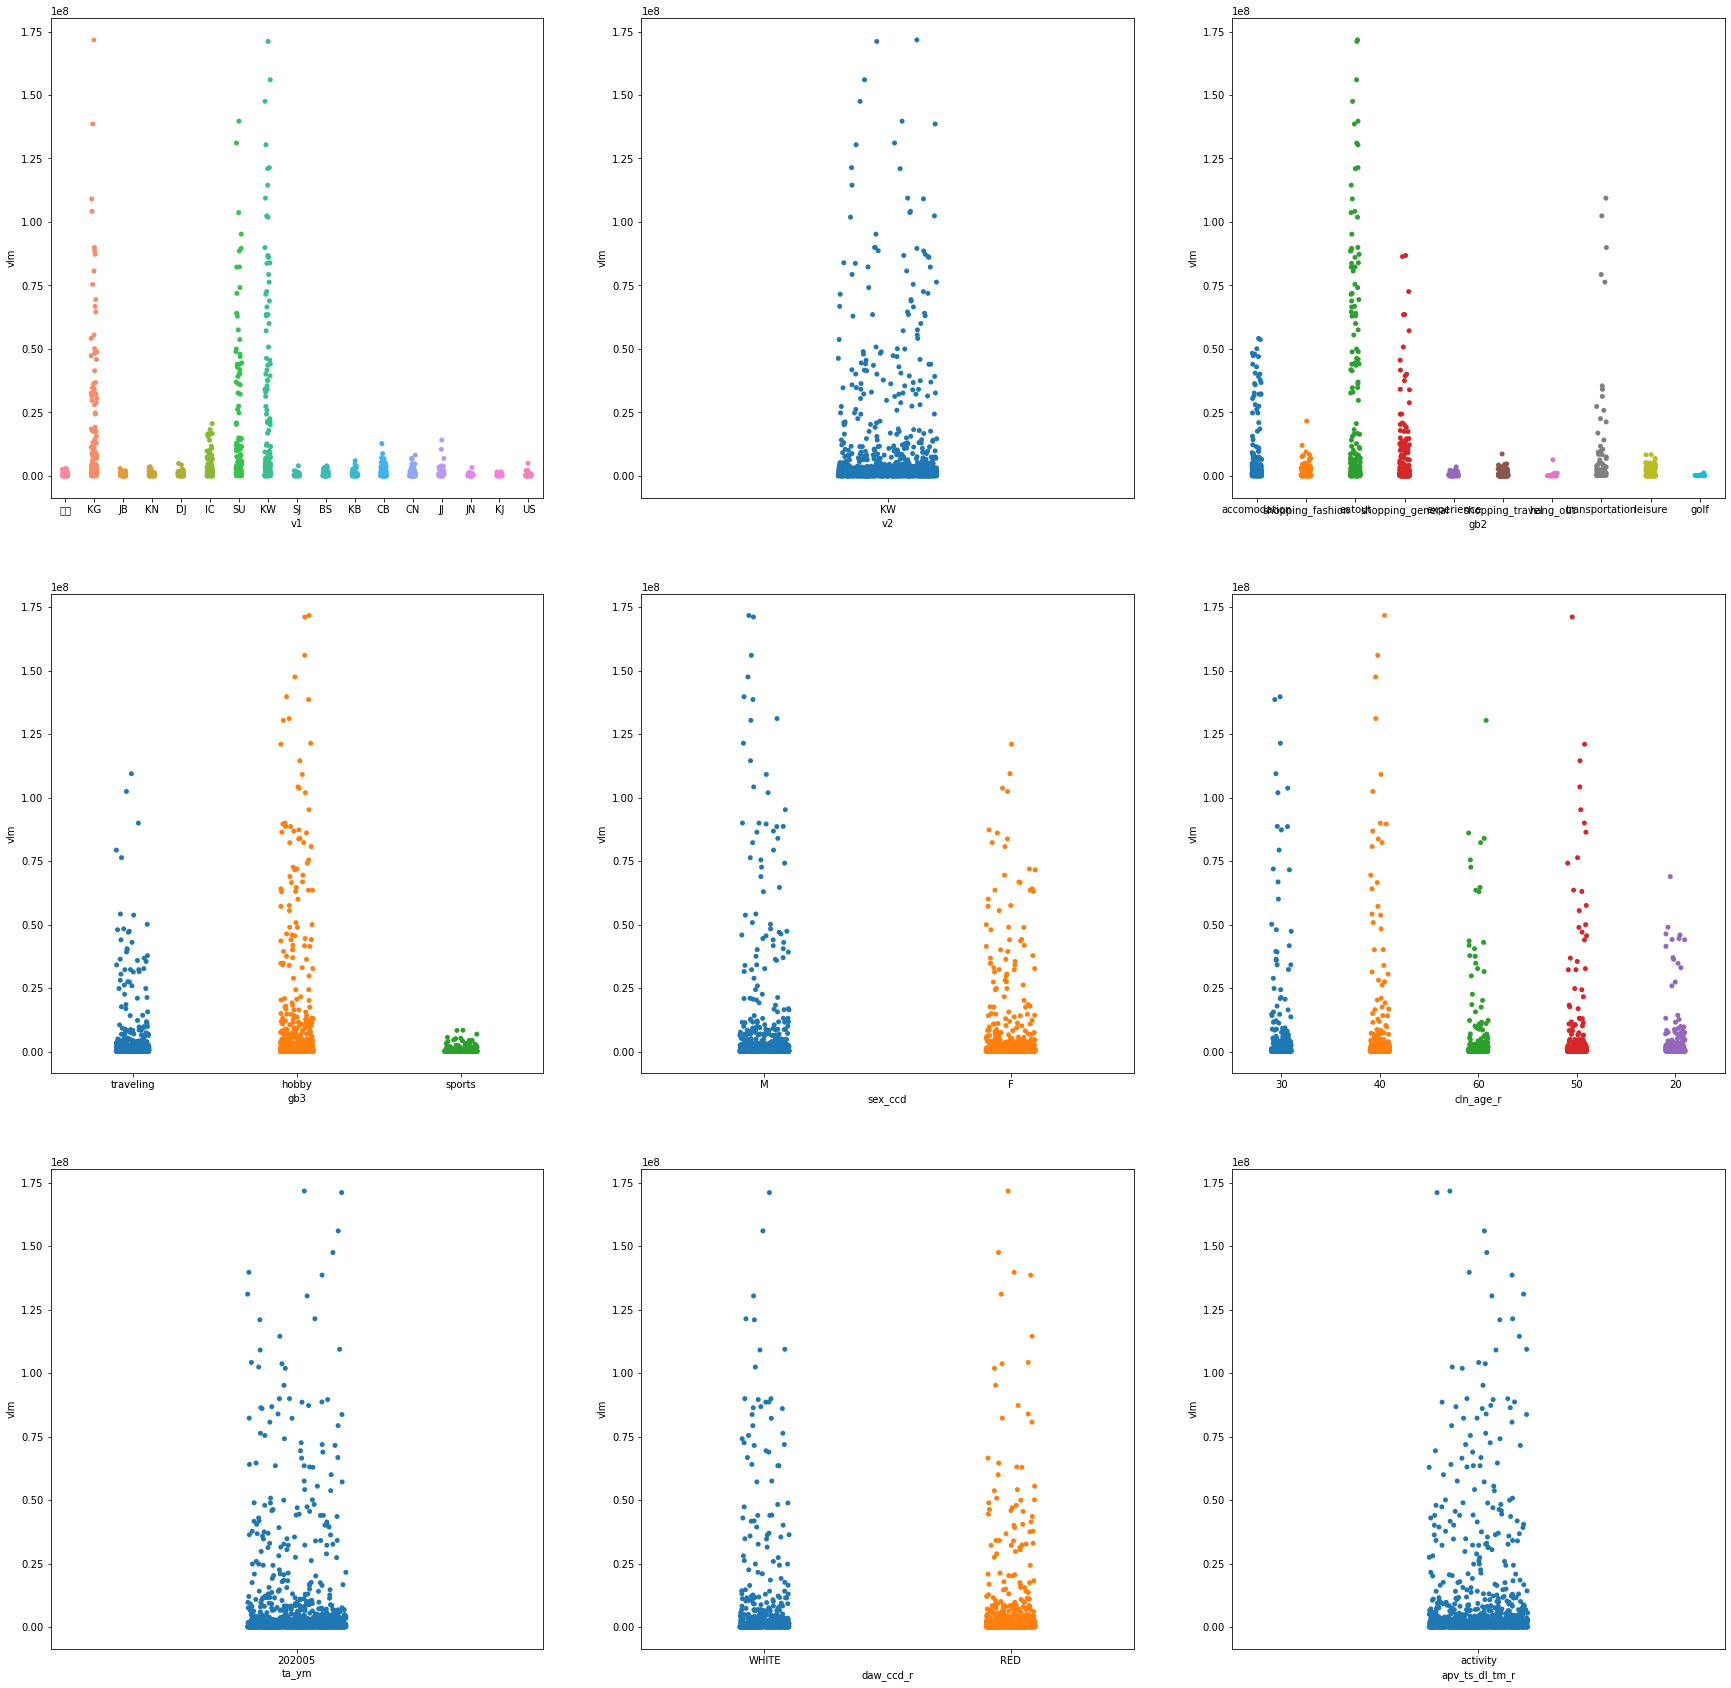

In [27]:
plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="vlm", data=native_yy[(native_yy['ta_ym'] == 202005) & (native_yy['apv_ts_dl_tm_r'] == 'activity')], ax=axs[row][col])

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


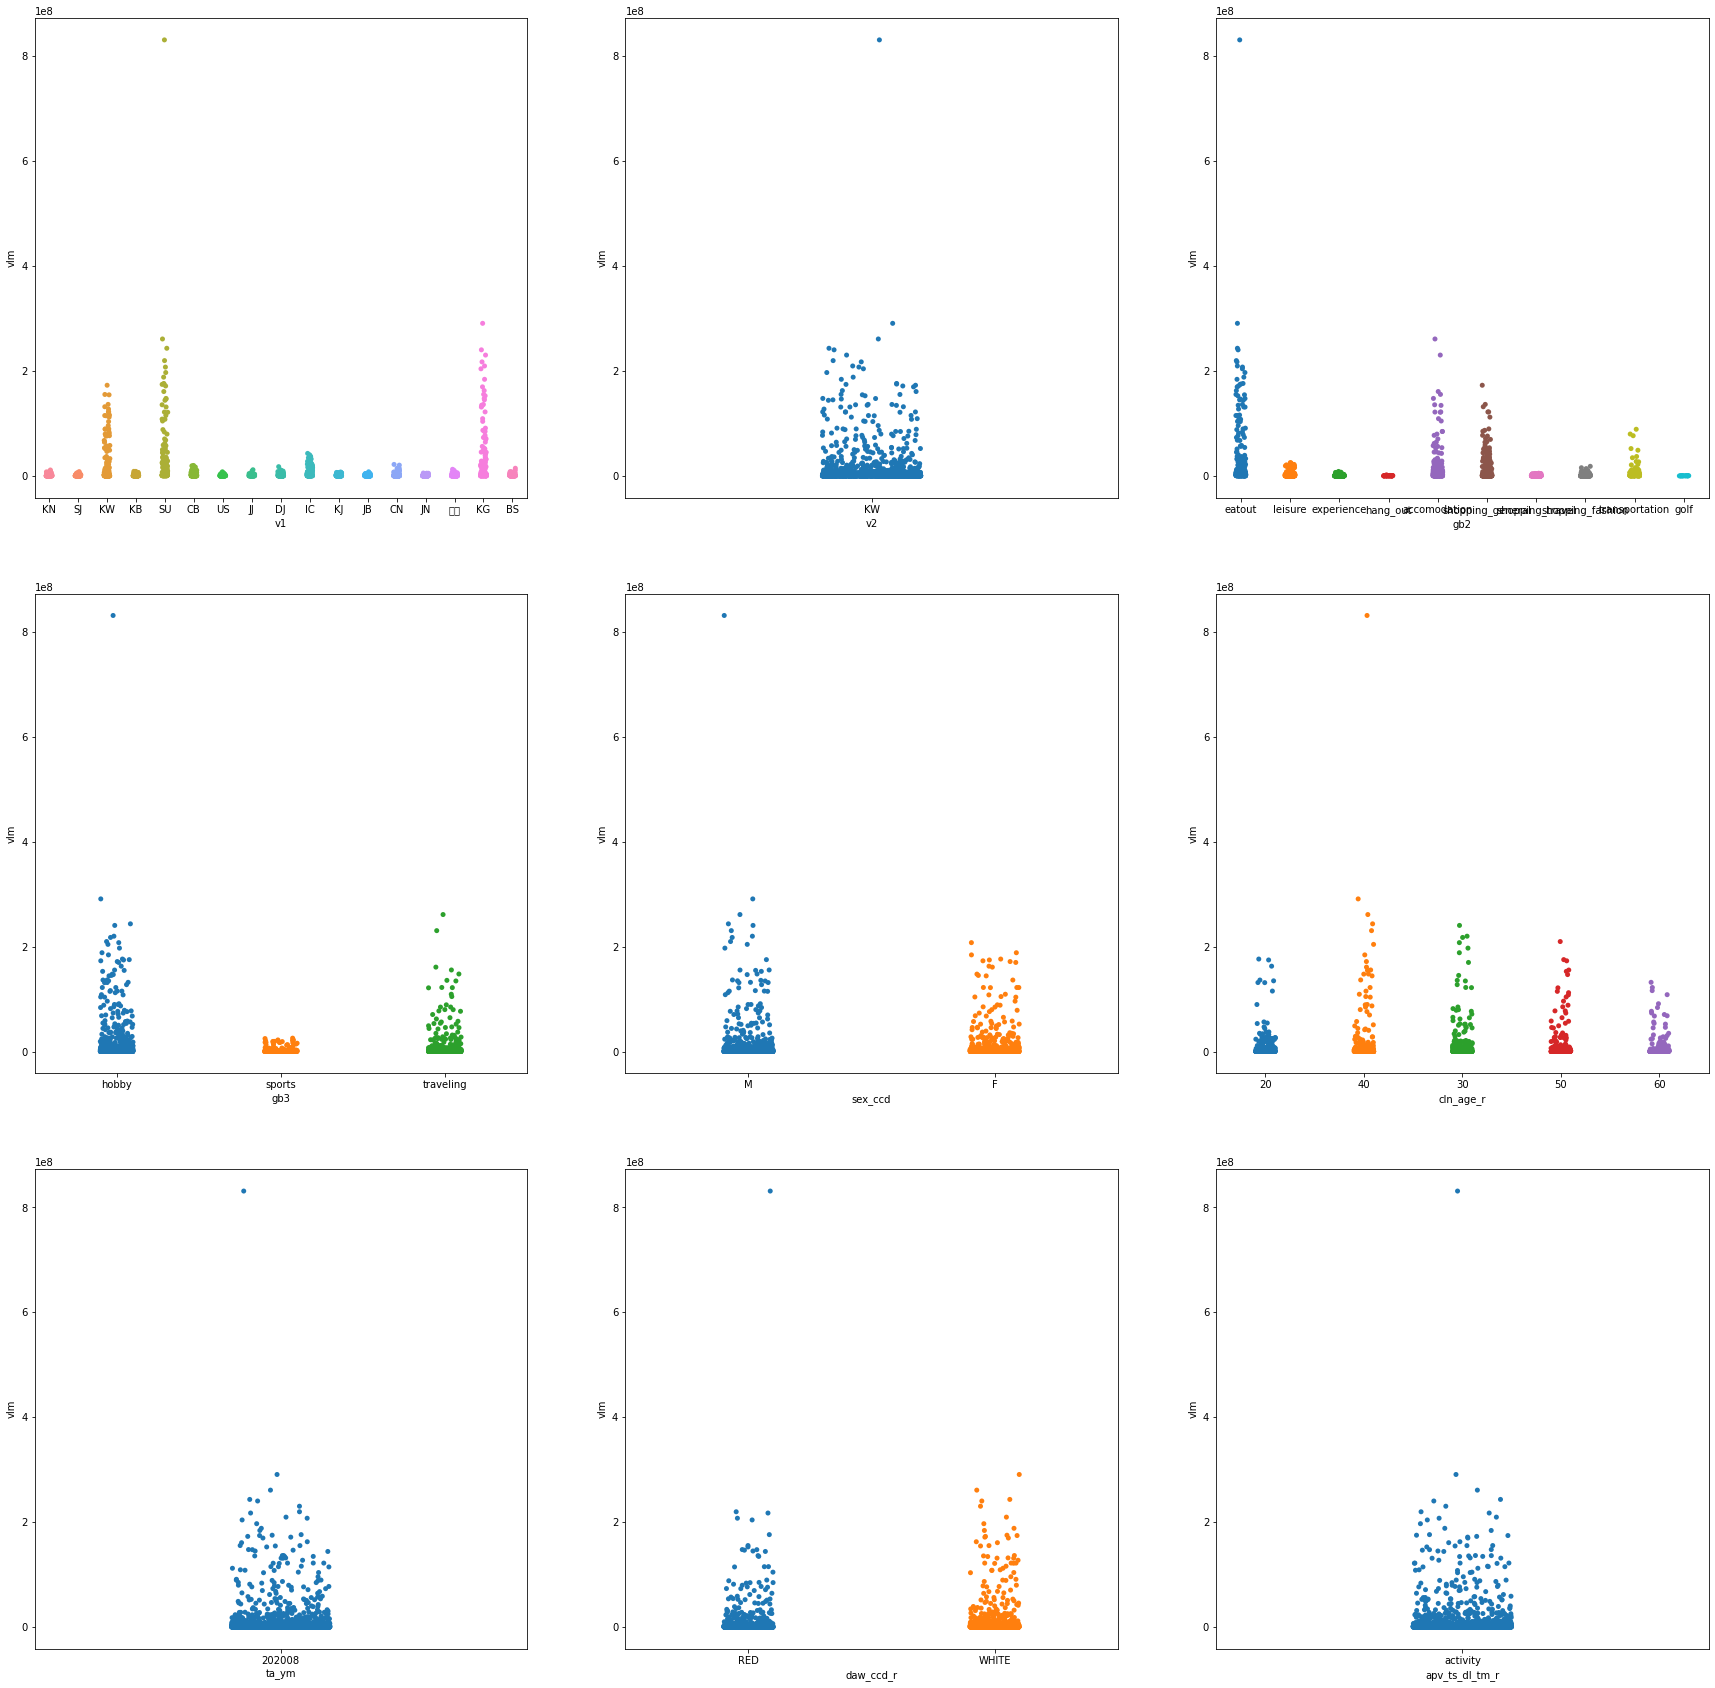

In [28]:
plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="vlm", data=native_yy[(native_yy['ta_ym'] == 202008) & (native_yy['apv_ts_dl_tm_r'] == 'activity')], ax=axs[row][col])

/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/eumhojun/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


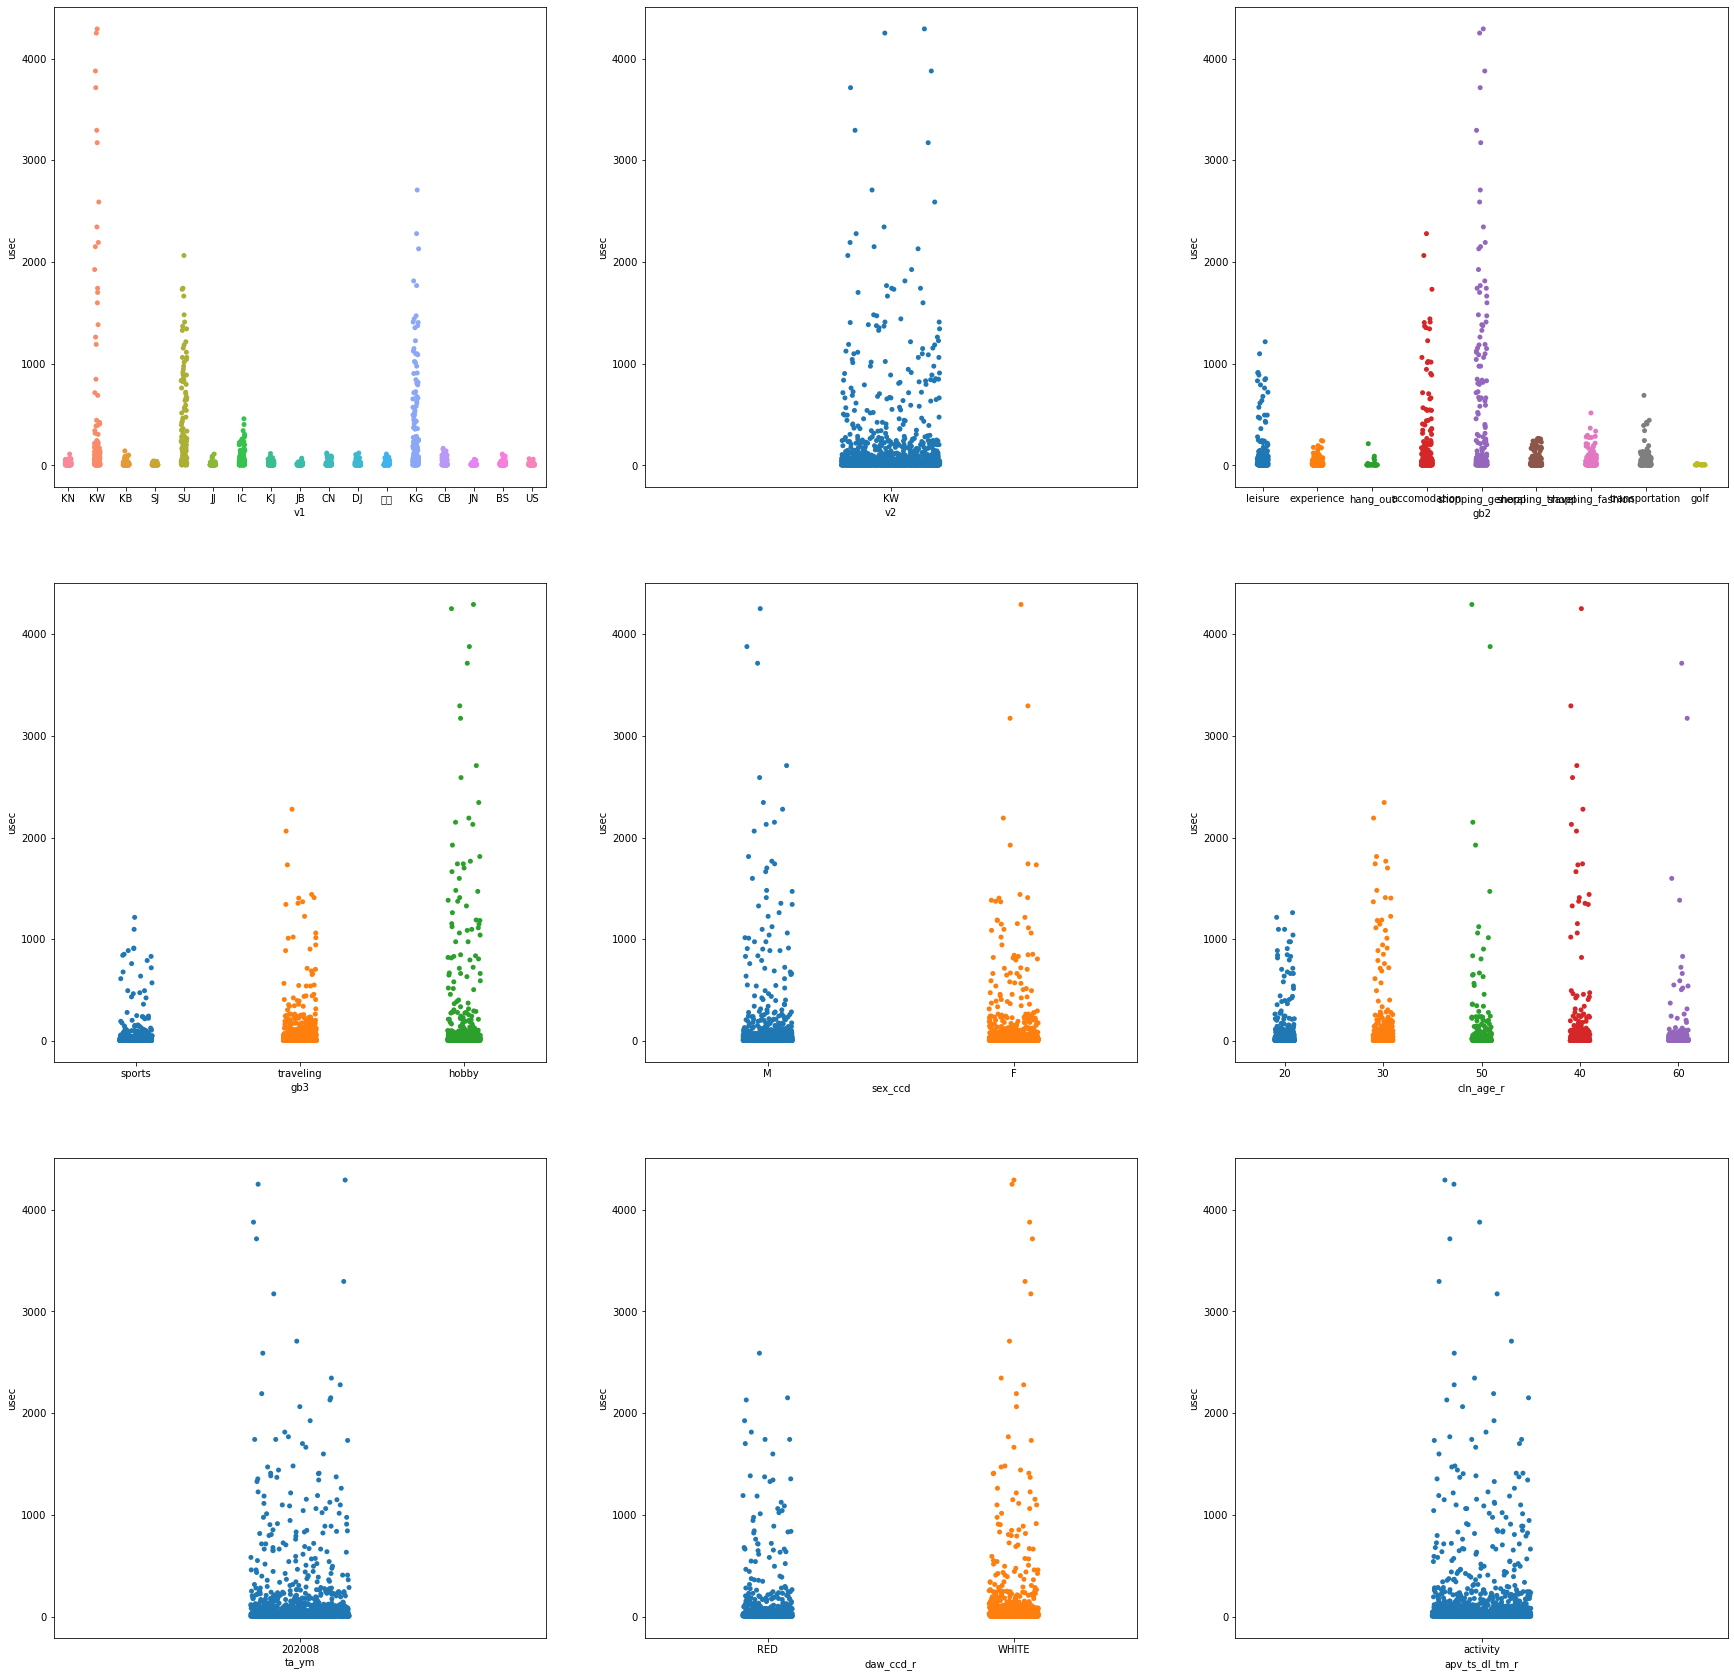

In [29]:
plt.rcParams['figure.figsize'] = [30, 30] # modify default plot size
fig, axs = plt.subplots(ncols=3, nrows=3)
sh_features = ["v1", "v2", "gb2", "gb3", "sex_ccd", "cln_age_r", "ta_ym", "daw_ccd_r", "apv_ts_dl_tm_r"]

for i, feature in enumerate(sh_features):
    row = int(i/3)
    col = i % 3
    
    sns.stripplot(x=feature, y="usec", data=native_yy[(native_yy['ta_ym'] == 202008) & (native_yy['apv_ts_dl_tm_r'] == 'activity') & ~(native_yy['gb2'] == 'eatout')], ax=axs[row][col])

월별 레저스포츠, 휴양, 숙박업 등 주요 국내 관광 수요 카테고리 이용건수, 지출액을 합산하여  
증가 추세를 분석한다. 

각 지역별 레저스포츠의(gb2) 카테고리별 월 이용건수, 지출액을 합산하여 19~21년 추이를 분석

In [30]:
print(native_yy['gb2'].value_counts())

eatout              16689
shopping_general    11455
accomodation        10961
shopping_travel      5188
leisure              5077
shopping_fashion     3011
hang_out             2983
transportation       2802
experience           1755
golf                  653
Name: gb2, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5077 entries, 24534039 to 52707988
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   usec    5077 non-null   int64
 1   vlm     5077 non-null   int64
 2   ta_ym   5077 non-null   int64
dtypes: int64(3)
memory usage: 158.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (ta_ym, )     29 non-null     int64  
 1   (usec, mean)  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes
    ta_ym       usec
                mean
0  201901  24.779412
1  201902  23.763889
2  201903  21.469136
3  201904  21.986842
4  201905  27.363014


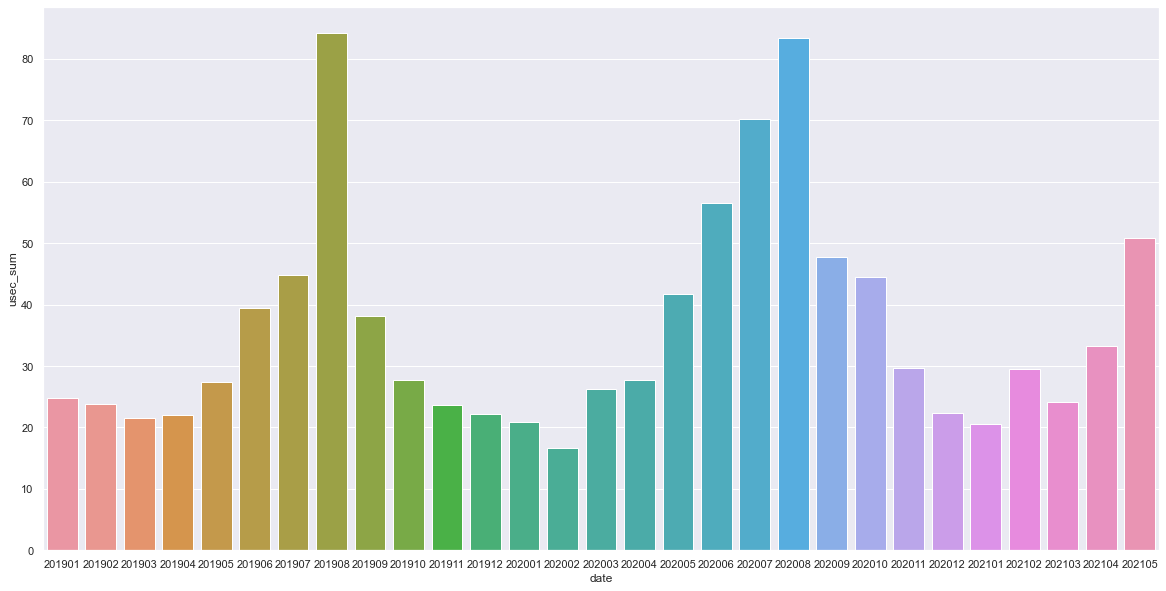

In [31]:
# 레저스포츠 데이터만 선별
native_leisure = native_yy[(native_yy['gb2'] == "leisure") & (native_yy["ta_ym"] >= 201901)]

# 이용건수, 지출액 칼럼만 남기고 나머지 레이블은 드롭
continuous_only = native_leisure[['usec', 'vlm', 'ta_ym']]

continuous_only.info()

# 월별로 이용건수 데이터를 평균
new = continuous_only.groupby(['ta_ym']).agg({'usec': ['mean']}).reset_index()

new.info()
print(new.head(5))

new.columns = ['date', 'usec_sum']

sns.set(rc={"figure.figsize": (20, 10)})
sns.barplot(x='date', y="usec_sum", data=new);

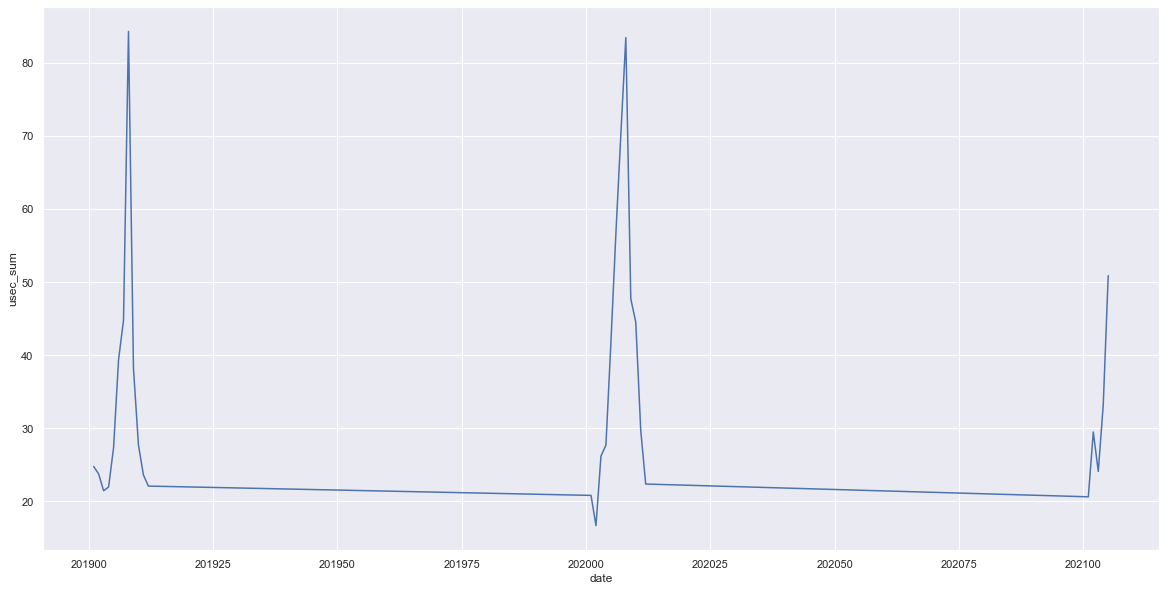

In [32]:
sns.lineplot(x='date', y="usec_sum", data=new);

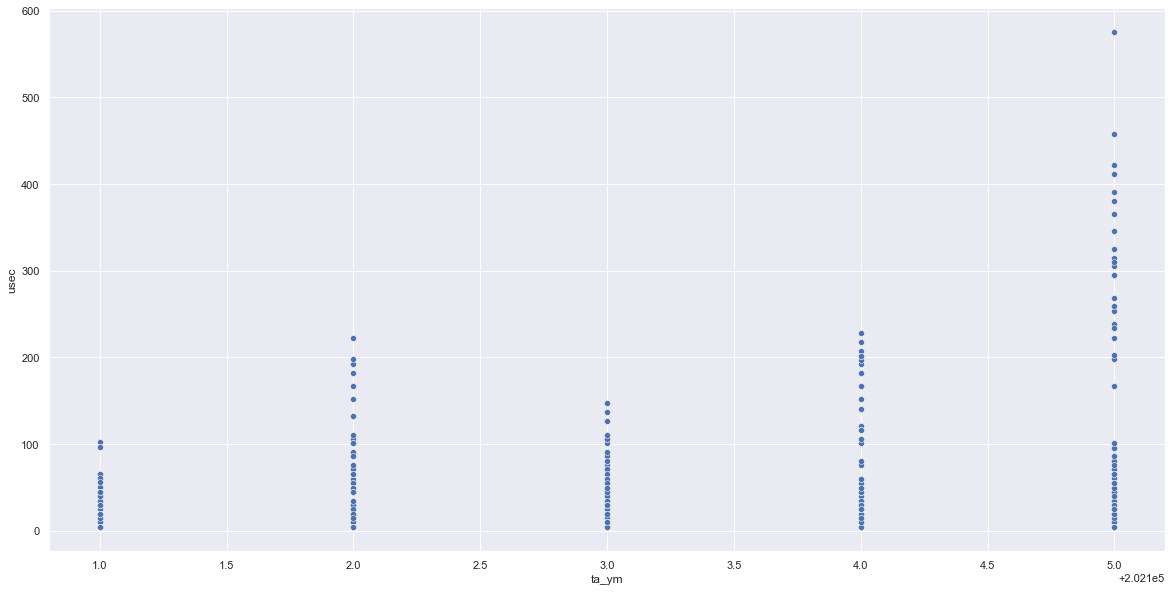

In [33]:
continuous_over2021 = continuous_only[continuous_only['ta_ym'] >= 202101]
sns.scatterplot(x='ta_ym', y="usec", data=continuous_over2021);

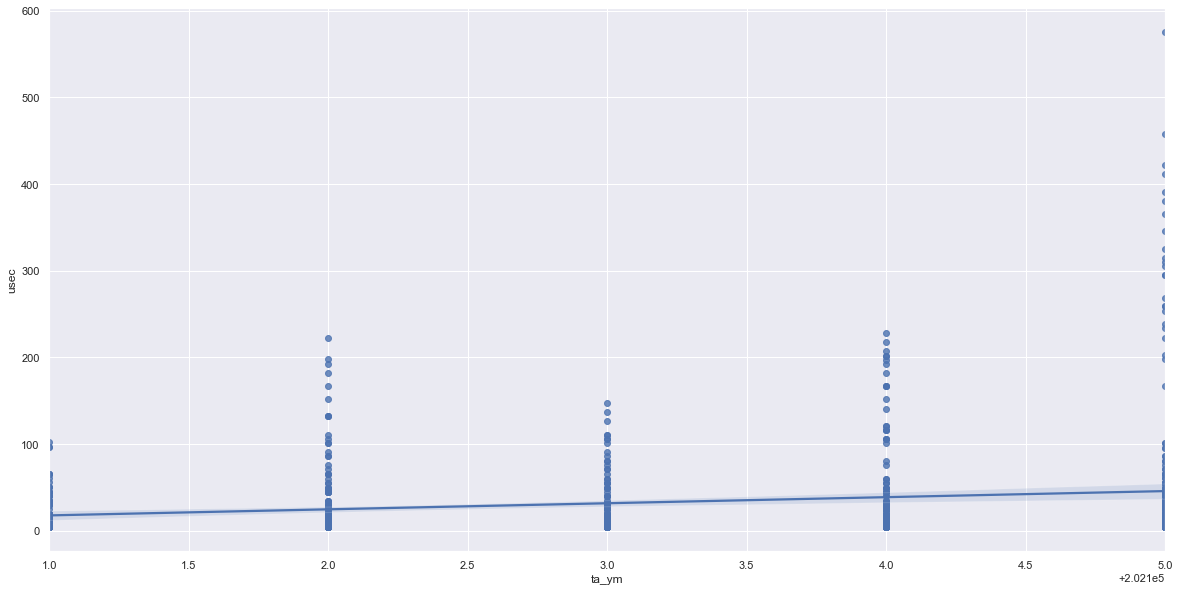

In [34]:
sns.regplot(x='ta_ym', y="usec", data=continuous_over2021);

seaborn 차트로 선형 회귀 그래프를 그렸을 때,  
약하지만 양의 경향성을 보이는 것을 볼 수 있다.

In [35]:
continuous_over2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 42597160 to 52707988
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   usec    836 non-null    int64
 1   vlm     836 non-null    int64
 2   ta_ym   836 non-null    int64
dtypes: int64(3)
memory usage: 26.1 KB


선형회귀 모델을 생성하고 성능을 테스트해봅니다.

In [36]:
continuous_over2021['usec'].value_counts()

5      298
10     126
15      73
20      57
25      37
      ... 
137      1
127      1
102      1
56       1
575      1
Name: usec, Length: 65, dtype: int64

In [37]:
avg = continuous_only.groupby(['ta_ym']).agg({'usec': ['mean']}).reset_index()

avg.columns = ['date', 'usec_mean']
avg.info()
avg.head(10)
avg['month'] = [i for i in range(1, 13)] + [i for i in range(1, 13)] + [i for i in range(1, 6)]
avg['year'] = [19 for _ in range(1, 13)] + [20 for _ in range(1, 13)] + [21 for _ in range(1, 6)]

avg.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       29 non-null     int64  
 1   usec_mean  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


,date,usec_mean,month,year
0,201901,24.779412,1,19
1,201902,23.763889,2,19
2,201903,21.469136,3,19
3,201904,21.986842,4,19
4,201905,27.363014,5,19
5,201906,39.378698,6,19
6,201907,44.768953,7,19
7,201908,84.281250,8,19
8,201909,38.181395,9,19
9,201910,27.751515,10,19


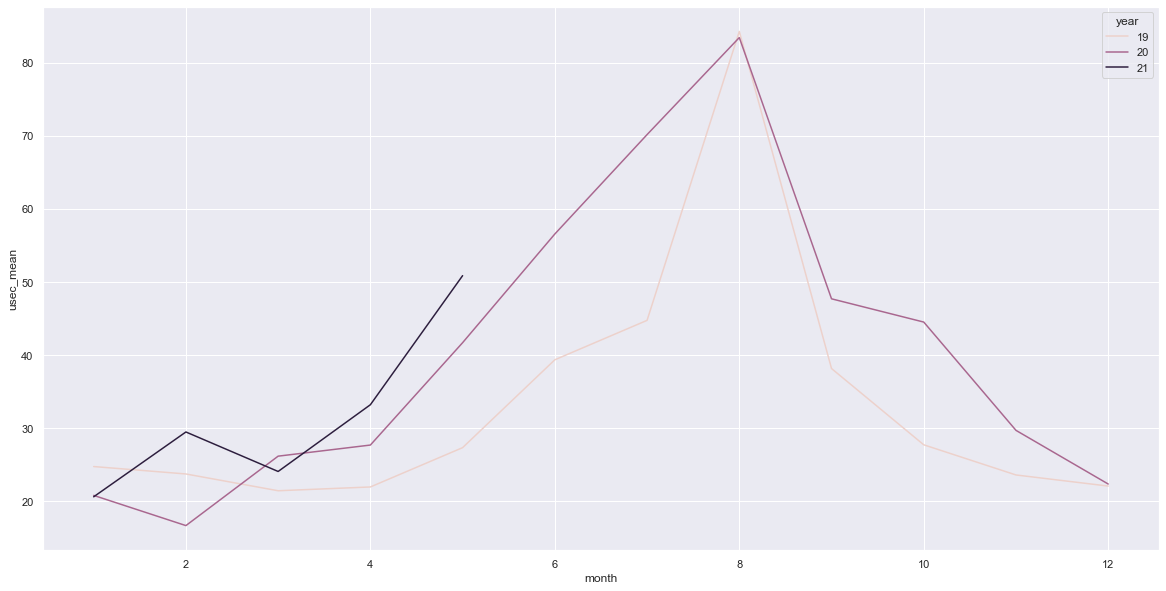

In [40]:
sns.set(rc={"figure.figsize": (20, 10)})

sns.lineplot(
    data=avg,
    x="month", y="usec_mean", hue="year",
    markers=True, dashes=False
);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   (ta_ym, )   29 non-null     int64
 1   (vlm, sum)  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes
    ta_ym       vlm
                sum
0  201901  31941506
1  201902  81475688
2  201903  42551300
3  201904  34187010
4  201905  86162481


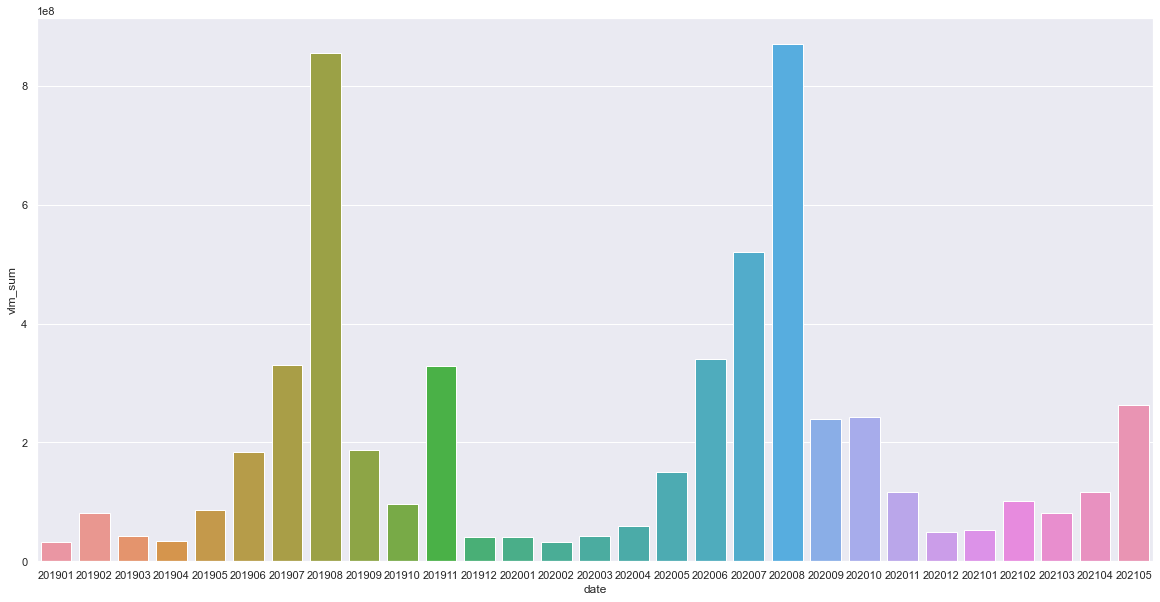

In [41]:
# 월별로 지출액 데이터를 합산
vlm_sum = continuous_only.groupby(['ta_ym']).agg({'vlm': ['sum']}).reset_index()

vlm_sum.info()
print(vlm_sum.head(5))

vlm_sum.columns = ['date', 'vlm_sum']

sns.barplot(x='date', y="vlm_sum", data=vlm_sum);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (ta_ym, )    25 non-null     int64
 1   (usec, sum)  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes
    ta_ym usec
           sum
0  201901   25
1  201904    5
2  201907   35
3  201908  125
4  201909  165


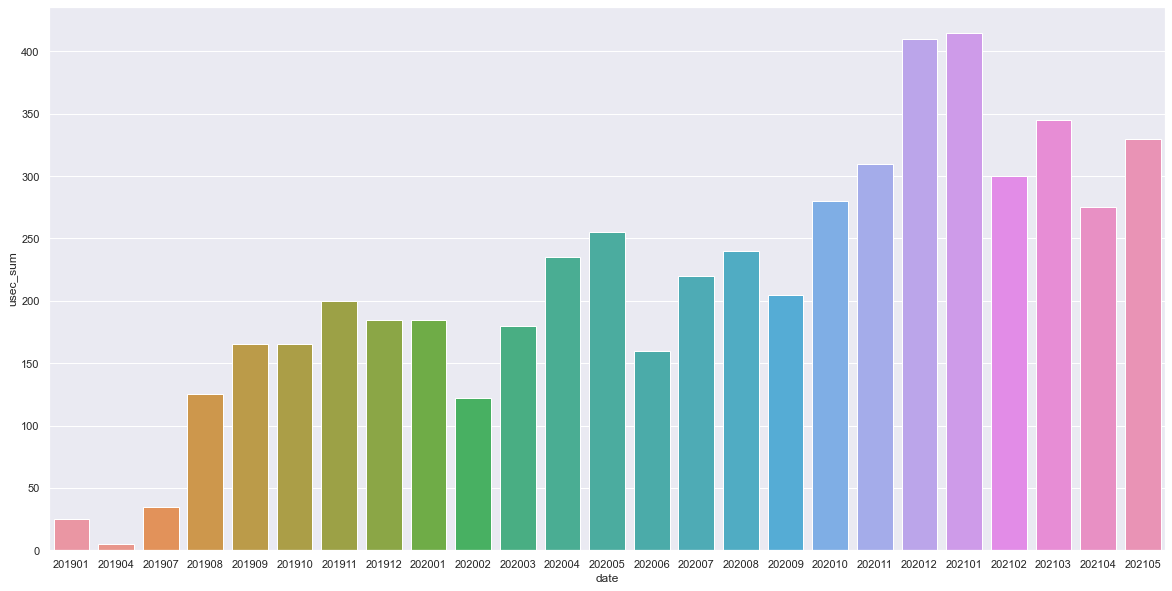

In [42]:
# 골프 데이터만 선별
native_golf = native_yy[(native_yy['gb2'] == "golf") & (native_yy["ta_ym"] >= 201901)]

# 이용건수, 지출액 칼럼만 남기고 나머지 레이블은 드롭
continuous_only = native_golf[['usec', 'vlm', 'ta_ym']]

# 월별로 이용건수 데이터를 합산
golf_sum = continuous_only.groupby(['ta_ym']).agg({'usec': ['sum']}).reset_index()

golf_sum.info()
print(golf_sum.head(5))

golf_sum.columns = ['date', 'usec_sum']

sns.barplot(x='date', y="usec_sum", data=golf_sum);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (ta_ym, )    29 non-null     int64
 1   (usec, sum)  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes
    ta_ym   usec
             sum
0  201901  30271
1  201902  32317
2  201903  25049
3  201904  19646
4  201905  28507


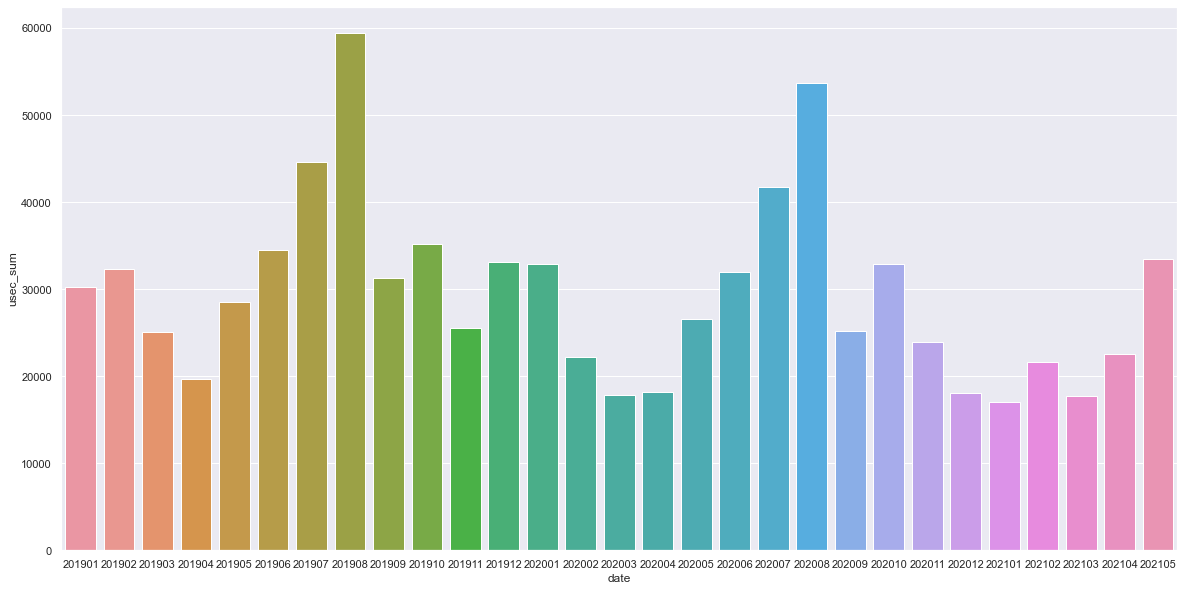

In [43]:
# 숙박 데이터만 선별
native_leisure = native_yy[(native_yy['gb2'] == "accomodation") & (native_yy["ta_ym"] >= 201901)]

# 이용건수, 지출액 칼럼만 남기고 나머지 레이블은 드롭
continuous_only = native_leisure[['usec', 'vlm', 'ta_ym']]

# 월별로 이용건수 데이터를 합산
accom_sum = continuous_only.groupby(['ta_ym']).agg({'usec': ['sum']}).reset_index()

accom_sum.info()
print(accom_sum.head(5))

accom_sum.columns = ['date', 'usec_sum']

sns.barplot(x='date', y="usec_sum", data=accom_sum);

양양 지역 숙박업은 19년 대비 감소, 20년 대비 21년 동월 이용건수 총합 증가.  

각 데이터는 숫자형(연속형)데이터가 아니라 카테고리형 피처가 대부분이므로,  
역시 이를 그대로 회귀분석에 사용할 수 는 없음. 따라서, 특정기준으로 연속형 피처인 이용건수, 지출액 레이블만 남기고,  
나머지 레이블은 드롭하는 방식으로 해야함.  
  
현재 강원 양양, 고성, 전남 고흥, 영광, 진도의 데이터가 있음.

월별 데이터는 연속형의 값이기는 하나, 이 값이 질적으로 연속된 숫자형의 의미를 가지지는 않음. 그냥 연속된 숫자형 값의 피처일 뿐임.  
연,월 값이 이용건수, 지출액과 수학적, 과학적 관계가 없다는 것임. 

그러나 유의미한 기간동안 지속적으로 일정한 추세를 보인다면 관계가 있다고 생각할 수 있음.  

월별 이용건수, 지출액이 피처값이 증가함에 따라 단조 증가, 감소하는 추세를 보이지는 않으므로, 선형 회귀는 부적합하다고 판단.  
다른 회귀분석은 유의미할 수 있음(예: 다항회귀 등)  



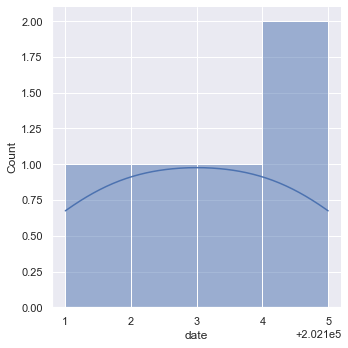

In [44]:
over2021 = new[new['date'] >= 202101]

ax = sns.displot(x='date', data=over2021, kde=True);

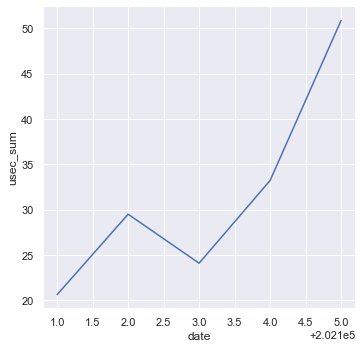

In [45]:
ax2 = sns.relplot(x='date', y='usec_sum', data=over2021, kind='line');

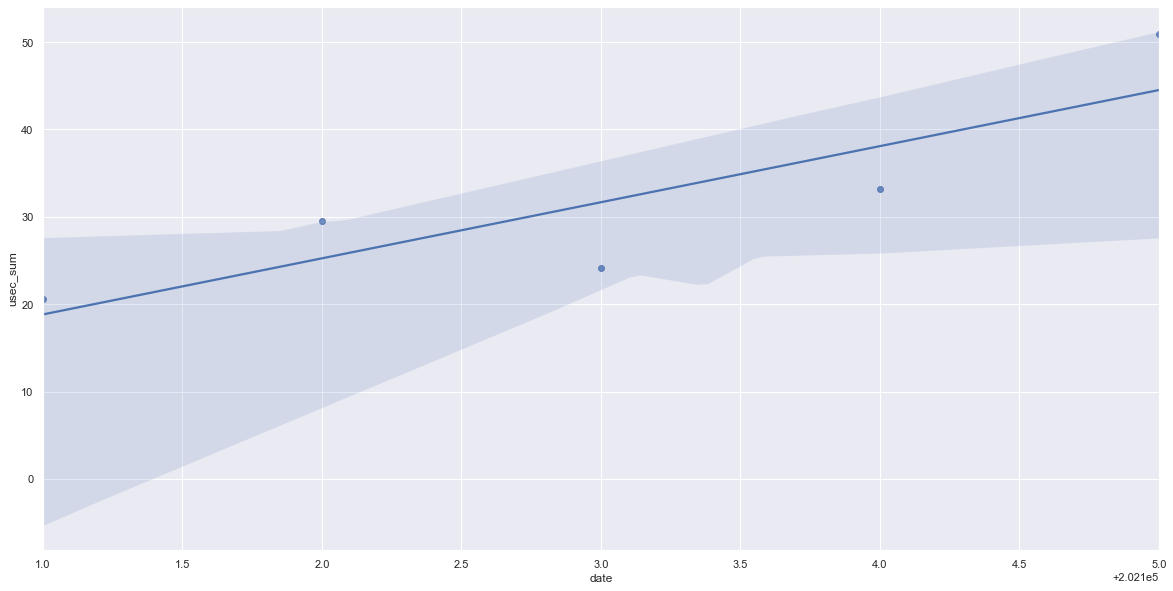

In [46]:
ax3 = sns.regplot(x="date", y="usec_sum", data=over2021)

In [47]:
over2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 24 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5 non-null      int64  
 1   usec_sum  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0 bytes
